## Data exploration - radial glia

In [1]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(RColorBrewer)
library(gridExtra)
library(ggh4x)

Attaching SeuratObject

Attaching sp


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




### Load / re-save object

Complete dataset:

In [23]:
# read in
rg_pool <- readRDS(file = "/local/Nina/jupyterlab/brains_trans/rg_pool_reg.rds")

In [107]:
# save this embedding with updated clustering and metadata labels
saveRDS(rg_pool, file = "/local/Nina/jupyterlab/brains_trans/rg_pool_reg.rds")

Pruned dataset (removed suspected doublet clusters) - use this for final figures:

In [108]:
# save the embedding with problematic clusters excluded
saveRDS(rg_pool_sub, file = "/local/Nina/jupyterlab/brains_trans/rg_pool_reg_sub.rds")

In [2]:
# read in
rg_pool_sub <- readRDS(file = "/local/Nina/jupyterlab/brains_trans/rg_pool_reg_sub.rds")

### Plot with improved aesthetics

#### UMAP of detailed cell types 

For the manuscript given the small size of the UMAP (on of the smaller subsets in Fig1) it will not be possible to display the full names on the UMAP, so I will display the number and then include the full cluster name as text in caption.

Given that I have 18 clusters in the current iteration, color selection so as to uniquely recognize them is rather difficult. I will rather generate a pallette with enough distinction that closely related clusters can be visually separated and rely on numeric labels to indicate each cluster.  
My solution for expanding the palette is based on https://r-graph-gallery.com/40-rcolorbrewer-get-a-longer-palette.html  
I try to keep it color-coordinated with the main cell types UMAP ie radial glia are in shades of purple. 

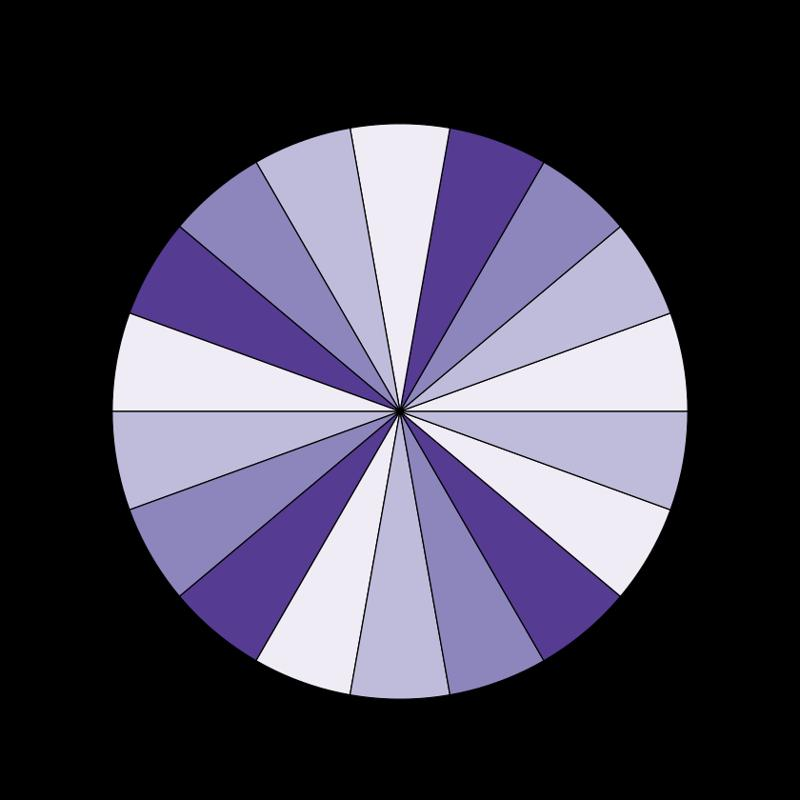

In [19]:
# No margin
par(mar=c(0,0,1,0))

# start with basic palette of Rcolor brewer, with 4 colors
col <- brewer.pal(4, "Purples") 

# Add more colors to this palette :
rg_col <- colorRampPalette(col)(18)

# Plot it
pie(rep(1, length(rg_col)), col = col , main="")

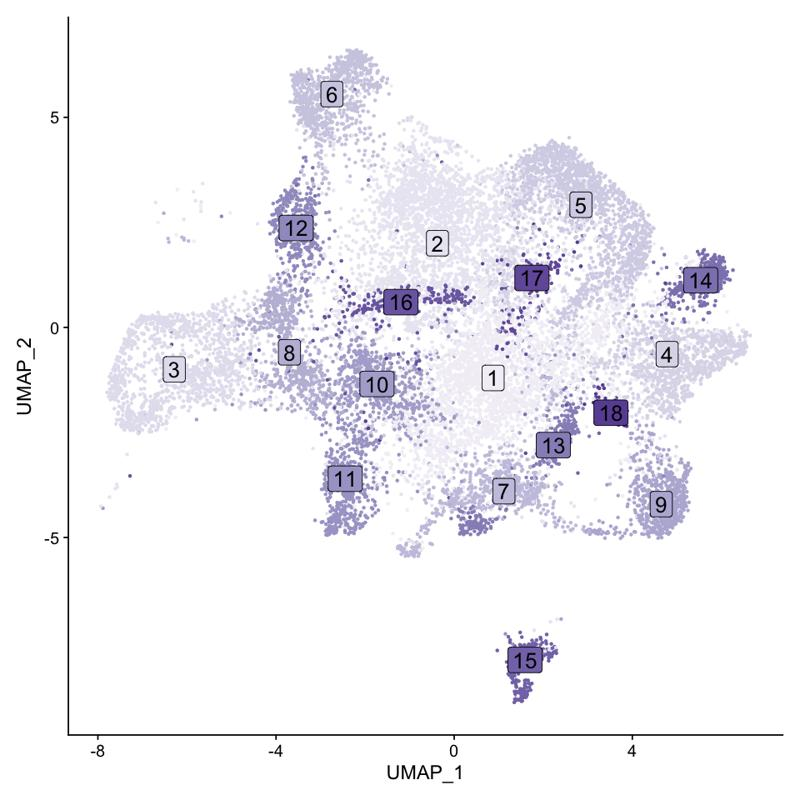

In [20]:
options(repr.plot.width=8, repr.plot.height=8)

umap_num <- DimPlot(rg_pool_sub, label = TRUE, cols = rg_col, 
        label.size = 5.5, label.box = TRUE, pt.size = 0.6, raster = FALSE) + NoLegend()
umap_num

In [21]:
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/rg_sub_umap_numbered.pdf", 
       plot = umap_num, 
       units = "in", height = 6, width = 6)


#### UMAP for regional specificity

In [22]:
str(rg_pool_sub@meta.data)

'data.frame':	15829 obs. of  38 variables:
 $ orig.ident                            : chr  "b1_tel" "b1_tel" "b1_tel" "b1_tel" ...
 $ nCount_RNA                            : num  870 822 662 2128 1073 ...
 $ nFeature_RNA                          : int  428 356 308 804 414 1169 1659 251 1273 1012 ...
 $ multiseq.relative.1.7                 : chr  NA NA NA NA ...
 $ brain_reg                             : chr  "tel" "tel" "tel" "tel" ...
 $ kit_chem                              : chr  "3prim_v1" "3prim_v1" "3prim_v1" "3prim_v1" ...
 $ fixation                              : chr  "fresh" "fresh" "fresh" "fresh" ...
 $ percent.mt                            : num  2.11 0.491 18.2982 0.5429 0.0656 ...
 $ ident                                 : chr  "b1_tel" "b1_tel" "b1_tel" "b1_tel" ...
 $ scDblFinder.class                     : chr  "singlet" "singlet" "singlet" "singlet" ...
 $ scDblFinder.score                     : num  0.0123 0.0873 0.1525 0.4752 0.2686 ...
 $ scDblFinder.weighted    

In [23]:
# pallette for brain regions based on https://colorbrewer2.org/#type=qualitative&scheme=Accent&n=5
reg_colors_umap <- c("Tel" = "#7fc97f", #green
                "Dien" = "#beaed4", #purple
                "Mes" = "#fdc086", #orange
                "Rhom" = "#ffff99", #yellow
                "Multi" = "#386cb0", #blue
                "Unknown" = "#bababa" #grey
                )

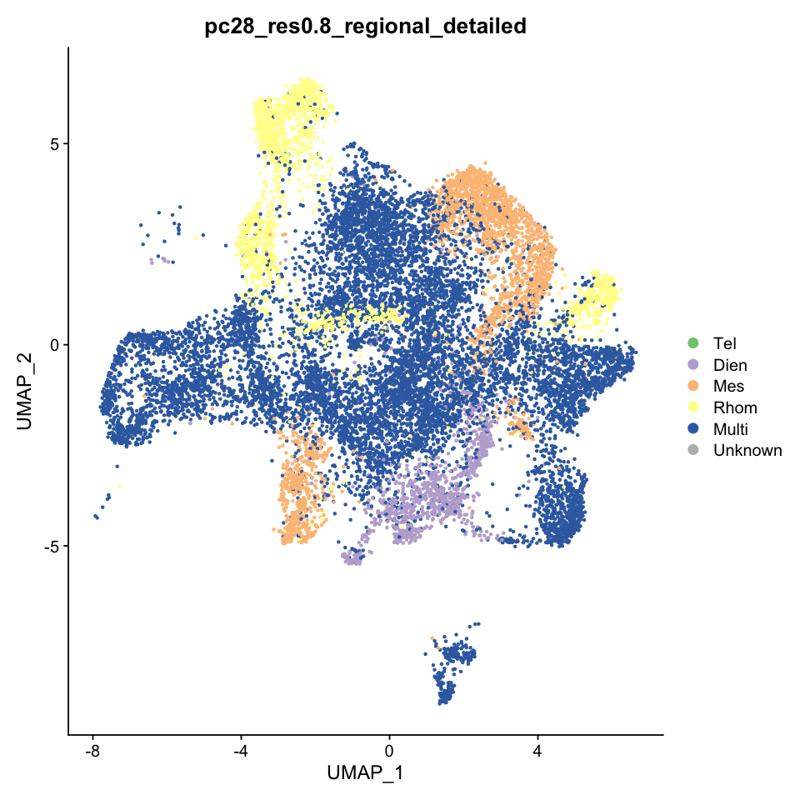

In [24]:
options(repr.plot.width=8, repr.plot.height=8)

DimPlot(rg_pool_sub, group.by = "pc28_res0.8_regional_detailed", 
         pt.size = 0.6, raster = FALSE, cols = reg_colors_umap)

##### Version 1

In [25]:
# pallette for simple regional classification
# https://colorbrewer2.org/#type=qualitative&scheme=Paired&n=3
reg_colors_simple_umap <- c("Regional" = "#b2df8a", # light green
                "Global" = "#a6cee3" #light blue
                )

In [26]:
# pallette for simple regional classification 
# use orange for proliferating cells for higher contrast
# https://colorbrewer2.org/#type=qualitative&scheme=Paired&n=12
reg_colors_simple_prol_umap <- c("Regional" = "#b2df8a", # light green
                "Global" = "#a6cee3", #light blue
                "Global prol." = "#fdbf6f" # light orange
                )

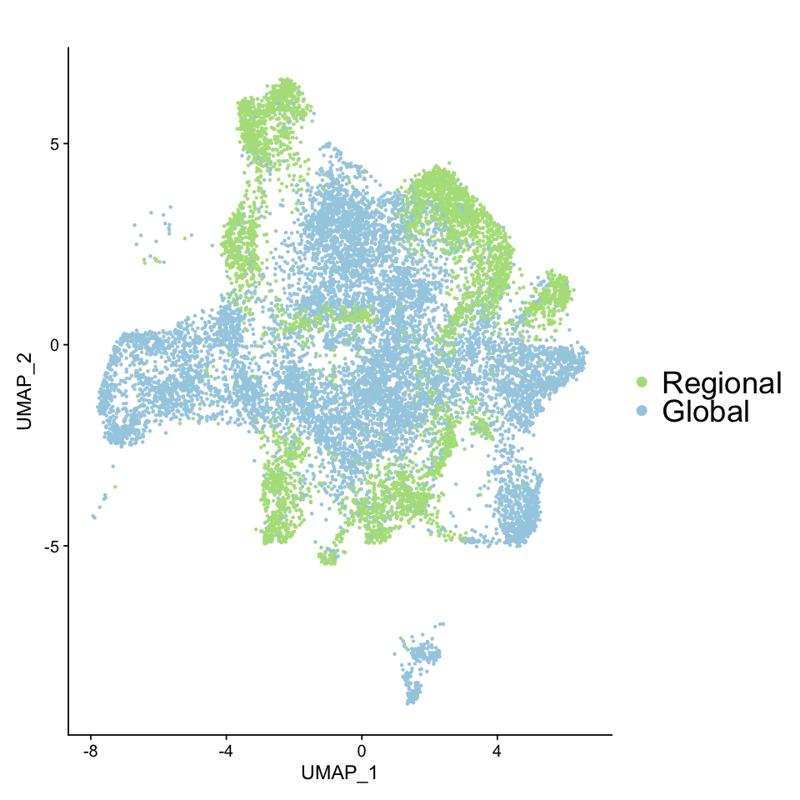

In [27]:
options(repr.plot.width=8, repr.plot.height=8)

umap_rg <- DimPlot(rg_pool_sub, group.by = "pc28_res0.8_regional_simple", 
         pt.size = 0.6, raster = FALSE, cols = reg_colors_simple_umap) +
        labs(title = "") +
        theme(legend.text = element_text(size = 22), legend.position = "right")
umap_rg
        

In [28]:
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/rg_sub_umap_regglo.pdf", 
       plot = umap_rg, 
       units = "in", height = 8, width = 8)


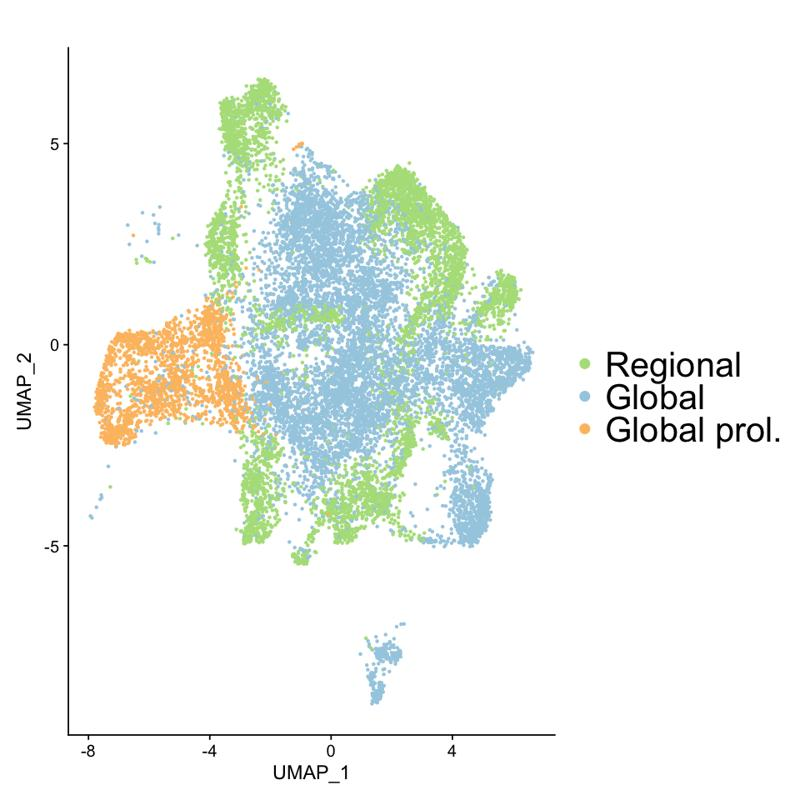

In [29]:
options(repr.plot.width=8, repr.plot.height=8)

umap_rgp <- DimPlot(rg_pool_sub, group.by = "pc28_res0.8_regional_simple_prol", 
         pt.size = 0.6, raster = FALSE, cols = reg_colors_simple_prol_umap) +
        labs(title = "") +
        theme(legend.text = element_text(size = 25), legend.position = "right")
umap_rgp      

In [30]:
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/rg_sub_umap_reggloprol.pdf", 
       plot = umap_rgp, 
       units = "in", height = 8, width = 8)

Try more saturated colors from the same pallette:  

In [31]:
# pallette for simple regional classification
# https://colorbrewer2.org/#type=qualitative&scheme=Paired&n=3
reg_colors_simple_umap <- c("Regional" = "#33a02c", #green
                "Global" = "#1f78b4" #blue
                )

In [32]:
# pallette for simple regional classification 
# use orange for proliferating cells for higher contrast
# https://colorbrewer2.org/#type=qualitative&scheme=Paired&n=12
reg_colors_simple_prol_umap <- c("Regional" = "#33a02c", #green
                "Global" = "#1f78b4", #blue
                "Global prol." = "#ff7f00" #orange
                )

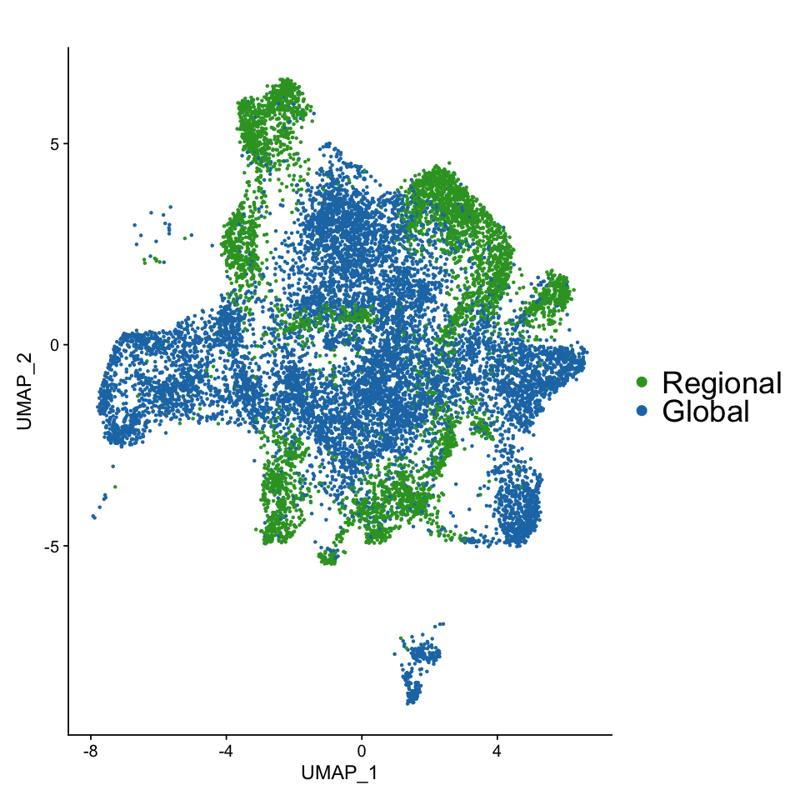

In [33]:
options(repr.plot.width=8, repr.plot.height=8)

umap_rg <- DimPlot(rg_pool_sub, group.by = "pc28_res0.8_regional_simple", 
         pt.size = 0.6, raster = FALSE, cols = reg_colors_simple_umap) +
        labs(title = "") +
        theme(legend.text = element_text(size = 22), legend.position = "right")
umap_rg
        

In [34]:
#ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/rg_sub_umap_regglo.pdf", 
       plot = umap_rg, 
       units = "in", height = 8, width = 8)


ERROR: Error in parse(text = x, srcfile = src): <text>:2:22: unexpected ','
1: #ggsave(filename = "/Volumes/NM_USB/jupyterlab/brains_trans/figs_seu/rg_sub_umap_regglo.pdf", 
2:        plot = umap_rg,
                        ^


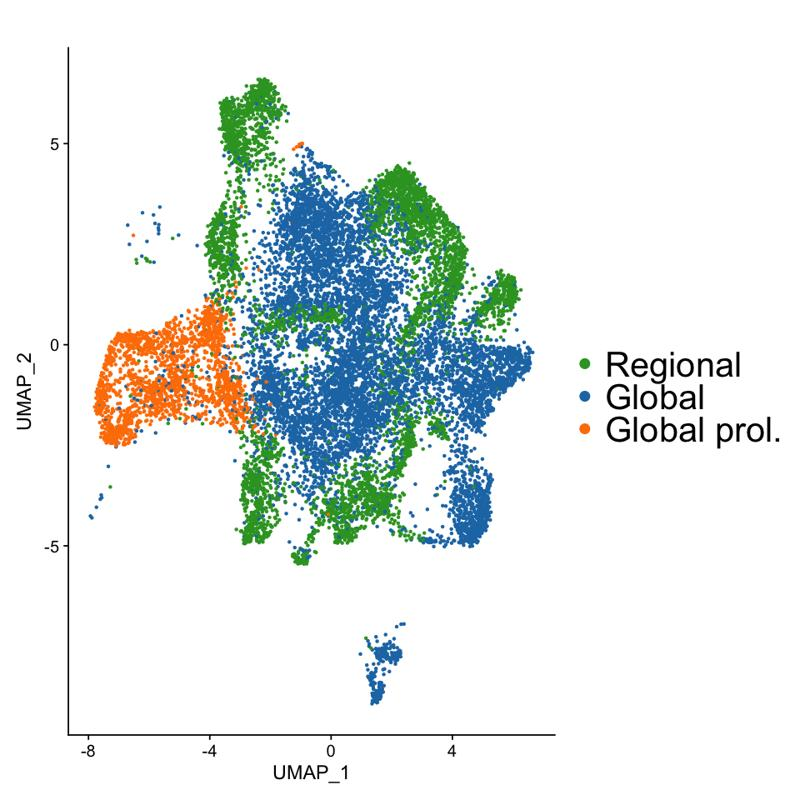

In [35]:
options(repr.plot.width=8, repr.plot.height=8)

umap_rgp <- DimPlot(rg_pool_sub, group.by = "pc28_res0.8_regional_simple_prol", 
         pt.size = 0.6, raster = FALSE, cols = reg_colors_simple_prol_umap) +
        labs(title = "") +
        theme(legend.text = element_text(size = 25), legend.position = "right")
umap_rgp      

In [36]:
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/rg_sub_umap_reggloprol.pdf", 
       plot = umap_rgp, 
       units = "in", height = 8, width = 8)

##### Version 2

Swap colors: orange for regional, blue for global, green for proliferating.  

In [16]:
# pallette for simple regional classification
# https://colorbrewer2.org/#type=qualitative&scheme=Paired&n=3
reg_colors_simple_umap <- c("Regional" = "#fdbf6f", # light orange
                "Global" = "#a6cee3" #light blue
                )

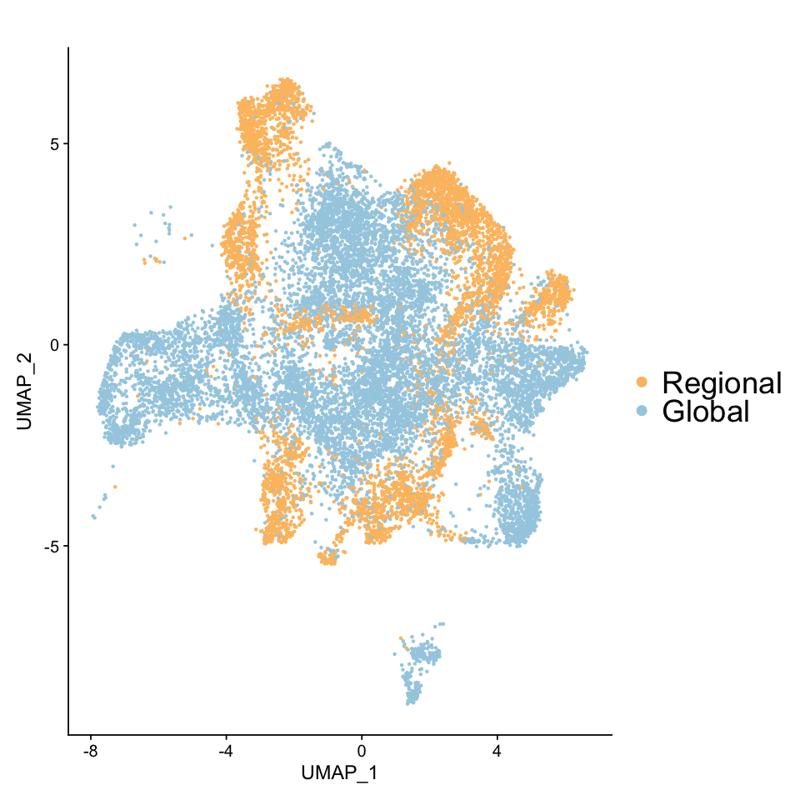

In [17]:
options(repr.plot.width=8, repr.plot.height=8)

umap_rg <- DimPlot(rg_pool_sub, group.by = "pc28_res0.8_regional_simple", 
         pt.size = 0.6, raster = FALSE, cols = reg_colors_simple_umap) +
        labs(title = "") +
        theme(legend.text = element_text(size = 22), legend.position = "right")
umap_rg
        

In [18]:
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/rg_sub_umap_regglo.pdf", 
       plot = umap_rg, 
       units = "in", height = 8, width = 8)


In [43]:
# pallette for 3-level classification 
# use orange for proliferating cells for higher contrast
# https://colorbrewer2.org/#type=qualitative&scheme=Paired&n=12
reg_colors_simple_prol_umap <- c("Regional" = "#fdbf6f", # light orange
                "Global" = "#a6cee3", #light blue
                "Global prol." = "#b2df8a" # light green
                )

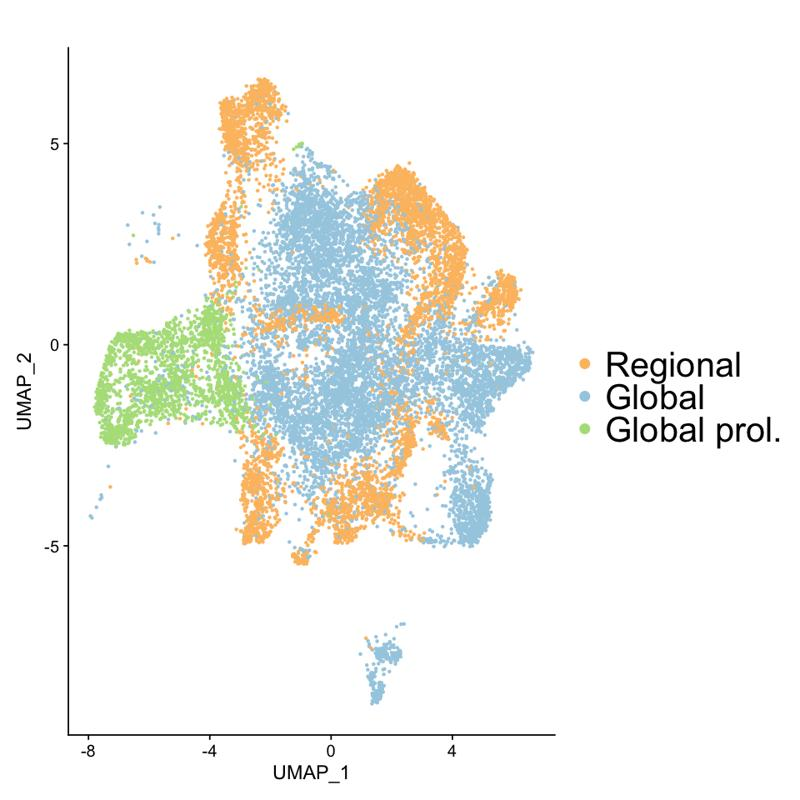

In [44]:
options(repr.plot.width=8, repr.plot.height=8)

umap_rgp <- DimPlot(rg_pool_sub, group.by = "pc28_res0.8_regional_simple_prol", 
         pt.size = 0.6, raster = FALSE, cols = reg_colors_simple_prol_umap) +
        labs(title = "") +
        theme(legend.text = element_text(size = 25), legend.position = "right")
umap_rgp      

In [45]:
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/rg_sub_umap_reggloprol.pdf", 
       plot = umap_rgp, 
       units = "in", height = 8, width = 8)

In [24]:
# pallette for 4-level classification 
# use orange for proliferating cells for higher contrast
# https://colorbrewer2.org/#type=qualitative&scheme=Paired&n=12
reg_colors_simple_prol_umap <- c("Regional" = "#fdbf6f", # light orange
                "Global" = "#a6cee3", #light blue
                "Global (prol.)" = "#b2df8a", # light green
                 "Global (Notch)" = "#cab2d6" # light purple
                )

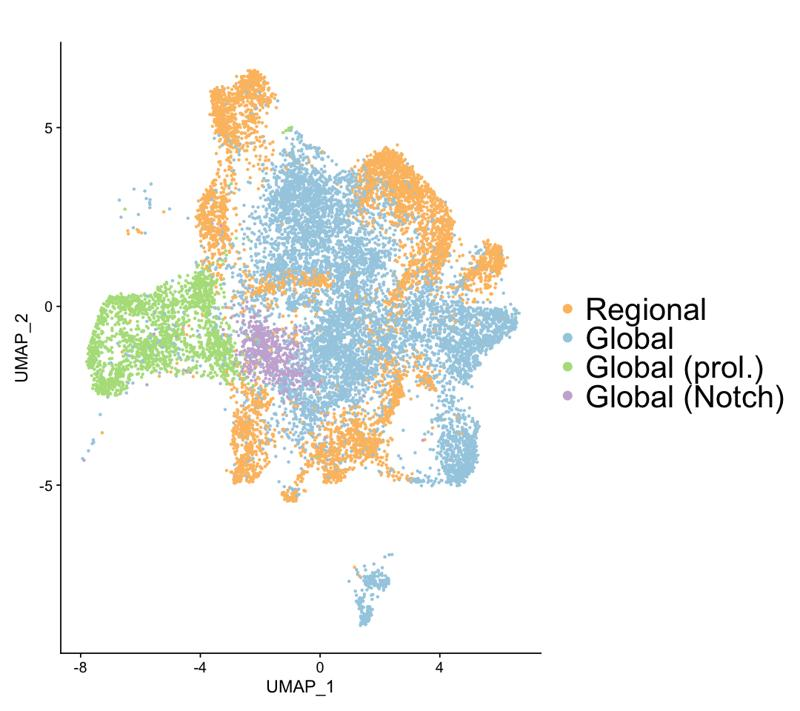

In [47]:
options(repr.plot.width=9, repr.plot.height=8)

umap_rgpn <- DimPlot(rg_pool_sub, group.by = "pc28_res0.8_regional_simple_prol_notch", 
         pt.size = 0.6, raster = FALSE, cols = reg_colors_simple_prol_umap) +
        labs(title = "") +
        theme(legend.text = element_text(size = 25), legend.position = "right")
umap_rgpn      

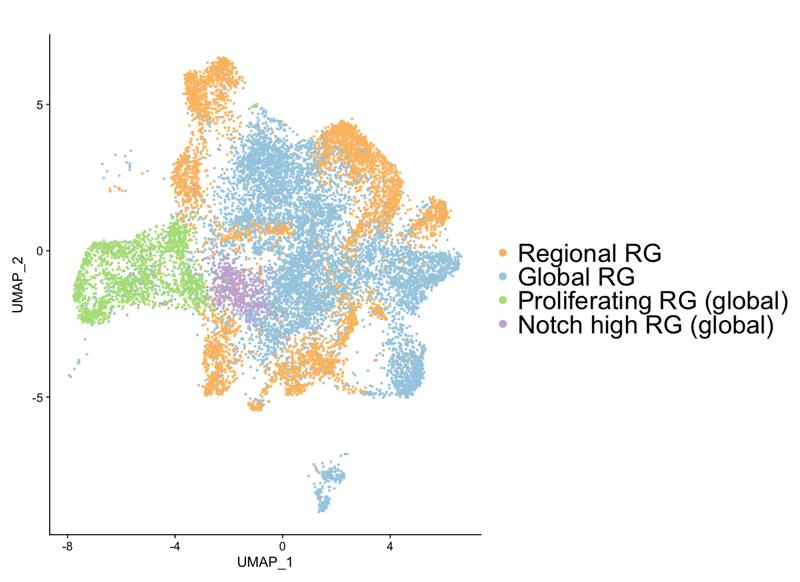

In [29]:
options(repr.plot.width=11, repr.plot.height=8)

umap_rgpn <- DimPlot(rg_pool_sub, group.by = "pc28_res0.8_regional_simple_prol_notch", 
         pt.size = 0.6, raster = FALSE) +
        labs(title = "") +
        theme(legend.text = element_text(size = 25), legend.position = "right") +
        scale_color_manual(breaks = c("Regional", "Global", "Global (prol.)", "Global (Notch)"), 
                           labels = c("Regional RG", "Global RG", "Proliferating RG (global)", "Notch high RG (global)"),
                          values = c("#fdbf6f", "#a6cee3", "#b2df8a", "#cab2d6"))
umap_rgpn      

In [30]:
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/rg_sub_umap_reggloprolnotch.pdf", 
       plot = umap_rgpn, 
       units = "in", height = 8, width = 11)

In [98]:
# to plot the score on a FeaturePlot it needs to be stored as numeric, which is from factor best to get via intermediate as.character representation
# otherwise numbers correspond to meaningless internal factor level storage values
#rg_pool_sub$pc28_res0.8_regional_score_num2 <- as.character(rg_pool_sub$pc28_res0.8_regional_score_num)
#rg_pool_sub$pc28_res0.8_regional_score_num2 <- as.numeric(rg_pool_sub$pc28_res0.8_regional_score_num2)

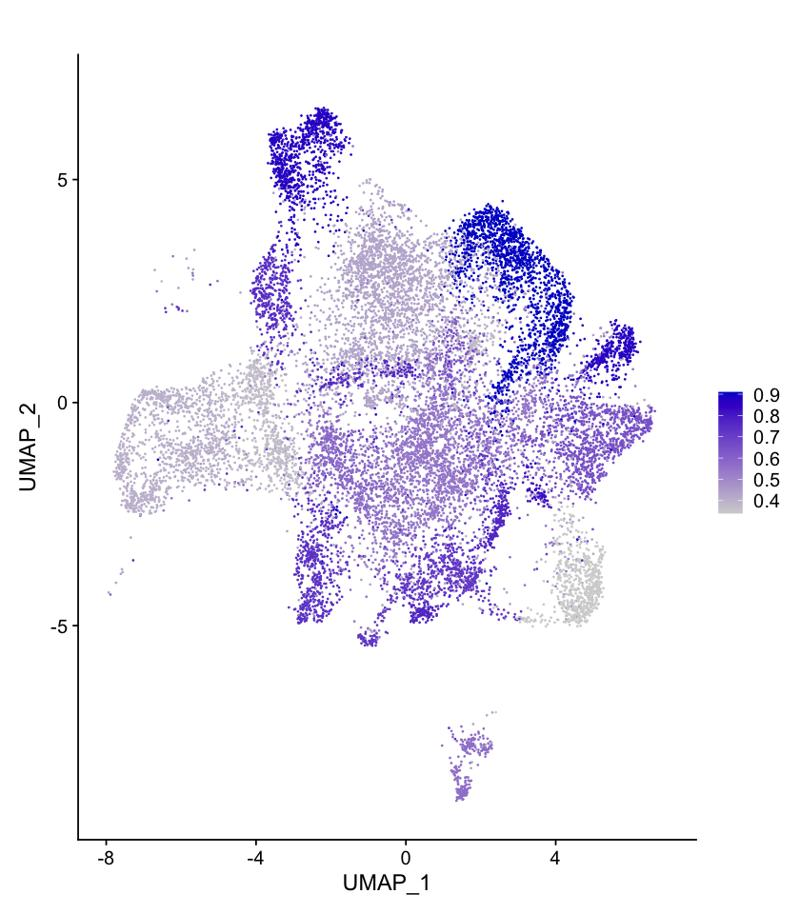

In [12]:
options(repr.plot.width=7, repr.plot.height=8)

fp_maxfr <- FeaturePlot(object = rg_pool_sub, reduction = 'umap', features = c("pc28_res0.8_max_fraction") , cols = c("lightgrey","mediumblue"), label=F, keep.scale = "all") +
        labs(title = "")
#c("lightgrey","mediumblue") #previous color version
fp_maxfr

In [14]:
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/rg_sub_fp_maxfr.pdf", 
       plot = fp_maxfr, 
       units = "in", height = 8, width = 7)


#### Regional specificity for named cluster

In [49]:
brain.reg.by.cluster <- table(rg_pool_sub$brain_reg, rg_pool_sub$pc28_res0.8_named_detailed_short_num)

In [50]:
brain.reg.by.cluster.diss <- brain.reg.by.cluster[c(1:4),]
brain.reg.by.cluster.diss

      
       1. RG id2b+ 2. RG snap25a+ 3. Prol mki67+ 4. RG nppc+ 5. RG apof+ (mes)
  dien         159            313            107         107                23
  mes          222            990             55          46               452
  rhom         113            202            133         242                 5
  tel          594            397            116          27                 5
      
       6. RG prss35+ (rhom) 7. RG id3+ (dien) 8. Prol mcm6+ 9. RG enkur+
  dien                   44               198            52           90
  mes                     1                34            25          157
  rhom                  236                 4            46           28
  tel                     0                49            78          101
      
       10. RG her4++ 11. RG foxn4+ (mes) 12. RG crabp1b+ (rhom)
  dien            29                  34                     30
  mes             36                 182                      6
  rhom            17       

In [51]:
# exclude clusters absent from this subset - 19, 20, 21
brain.reg.by.cluster.diss <- brain.reg.by.cluster.diss[,-c(19,20,21)]
brain.reg.by.cluster.diss

      
       1. RG id2b+ 2. RG snap25a+ 3. Prol mki67+ 4. RG nppc+ 5. RG apof+ (mes)
  dien         159            313            107         107                23
  mes          222            990             55          46               452
  rhom         113            202            133         242                 5
  tel          594            397            116          27                 5
      
       6. RG prss35+ (rhom) 7. RG id3+ (dien) 8. Prol mcm6+ 9. RG enkur+
  dien                   44               198            52           90
  mes                     1                34            25          157
  rhom                  236                 4            46           28
  tel                     0                49            78          101
      
       10. RG her4++ 11. RG foxn4+ (mes) 12. RG crabp1b+ (rhom)
  dien            29                  34                     30
  mes             36                 182                      6
  rhom            17       

In [52]:
#margin = 1 sums across rows (how is brain reg distributed over clusters)
brain.reg.by.cluster.diss.norm <- round(prop.table(brain.reg.by.cluster.diss, margin = 1), digits = 10)
#brain.reg.by.cluster.norm <- brain.reg.by.cluster.perc1 * 100

In [53]:
brain.reg.by.cluster.diss.norm

      
        1. RG id2b+ 2. RG snap25a+ 3. Prol mki67+  4. RG nppc+
  dien 0.1153009427   0.2269760696   0.0775924583 0.0775924583
  mes  0.0963960052   0.4298740773   0.0238818932 0.0199739470
  rhom 0.0873261206   0.1561051005   0.1027820711 0.1870170015
  tel  0.3626373626   0.2423687424   0.0708180708 0.0164835165
      
       5. RG apof+ (mes) 6. RG prss35+ (rhom) 7. RG id3+ (dien) 8. Prol mcm6+
  dien      0.0166787527         0.0319071791      0.1435823060  0.0377084844
  mes       0.1962657403         0.0004342162      0.0147633521  0.0108554060
  rhom      0.0038639876         0.1823802164      0.0030911901  0.0355486862
  tel       0.0030525031         0.0000000000      0.0299145299  0.0476190476
      
       9. RG enkur+ 10. RG her4++ 11. RG foxn4+ (mes) 12. RG crabp1b+ (rhom)
  dien 0.0652646846  0.0210297317        0.0246555475           0.0217548949
  mes  0.0681719496  0.0156317846        0.0790273556           0.0026052974
  rhom 0.0216383308  0.0131375580        0.

In [54]:
#margin = 2 sums across columns (which brain regs make up each cluster) - this is what I need for per cluster calculation
#use as input rowwise normalized data
brain.reg.by.cluster.diss.df <- as.data.frame(round(prop.table(brain.reg.by.cluster.diss.norm, margin = 2), digits = 10))
colnames(brain.reg.by.cluster.diss.df) <- c("Brain.reg", "Cluster", "Fraction")

In [55]:
head(brain.reg.by.cluster.diss.df)

,Brain.reg,Cluster,Fraction
,<fct>,<fct>,<dbl>
1,dien,1. RG id2b+,0.1742600
2,mes,1. RG id2b+,0.1456880
3,rhom,1. RG id2b+,0.1319803
4,tel,1. RG id2b+,0.5480717
5,dien,2. RG snap25a+,0.2150771
6,mes,2. RG snap25a+,0.4073385


In [56]:
# pallette for brain regions based on https://colorbrewer2.org/#type=qualitative&scheme=Accent&n=5
reg_colors <- c("tel" = "#7fc97f", #green
                "dien" = "#beaed4", #purple
                "mes" = "#fdc086", #orange
                "rhom" = "#ffff99", #yellow
                "whole" = "#386cb0" #blue
                )

In [57]:
p_br_diss <- ggplot(data = brain.reg.by.cluster.diss.df, aes(x = Cluster, y = Fraction, fill = Brain.reg)) +
    geom_bar(stat="identity") + 
    coord_cartesian(ylim = c(0,1)) + 
    labs(x="Cluster", y="Fraction") +  
    theme(axis.title = element_text(size = 18), axis.text = element_text(size = 16),   plot.title = element_text(size = 16, hjust = 0.5), legend.text = element_text(size = 16), legend.title = element_text(size = 18), legend.position = "bottom")  +
    guides(fill = guide_legend(nrow = 2, byrow = TRUE)) +
    coord_flip() + 
    scale_fill_manual(values = reg_colors, name = "Brain region", limits = c("tel", "dien", "mes", "rhom")) 

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



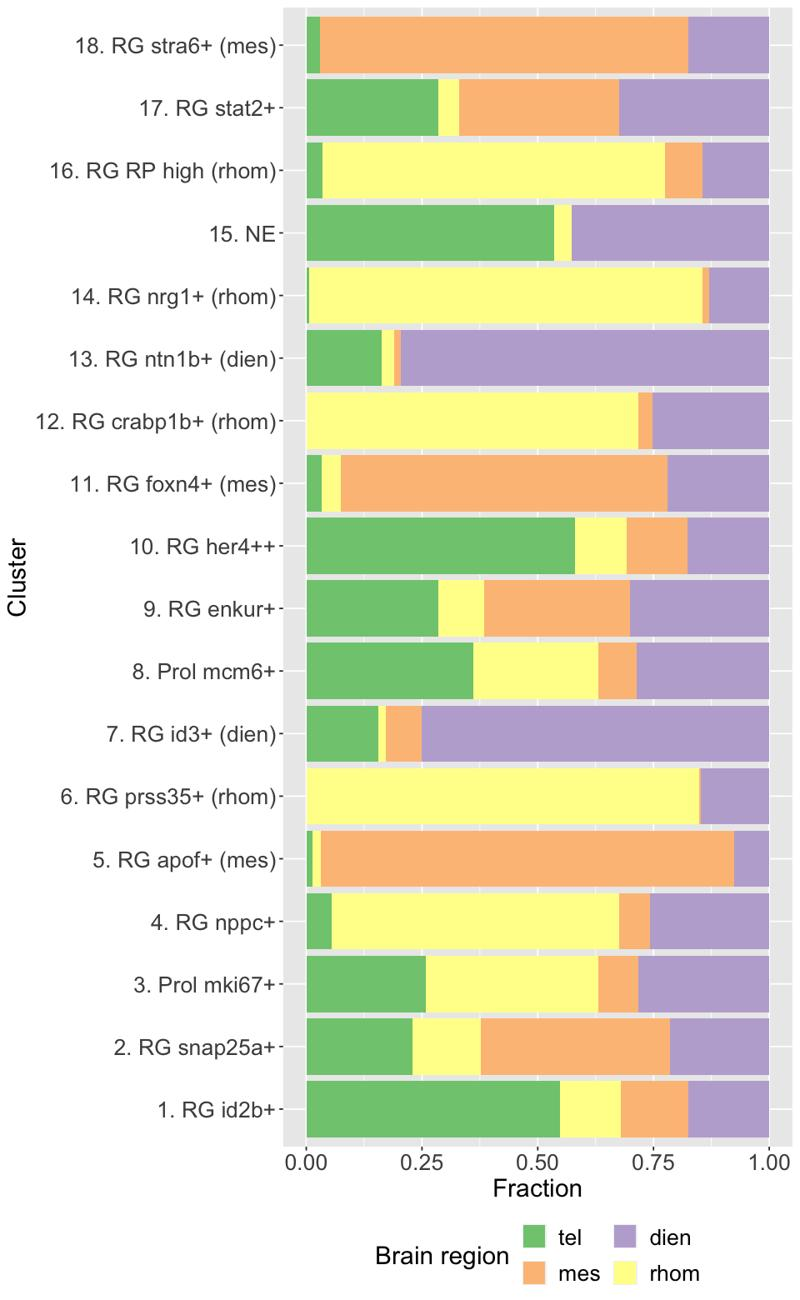

In [58]:
options(repr.plot.width=8, repr.plot.height=13)

p_br_diss

In [59]:
#save figure pdf
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/rg_sub_barplot_regions_2a.pdf",
       plot = p_br_diss, units = "in", height = 13, width = 8)

#### Regional specificity for named cluster - set exact size

In [4]:
brain.reg.by.cluster <- table(rg_pool_sub$brain_reg, rg_pool_sub$pc28_res0.8_named_detailed_short_num)

In [5]:
brain.reg.by.cluster.diss <- brain.reg.by.cluster[c(1:4),]
brain.reg.by.cluster.diss

      
       1. RG id2b+ 2. RG snap25a+ 3. Prol mki67+ 4. RG nppc+ 5. RG apof+ (mes)
  dien         159            313            107         107                23
  mes          222            990             55          46               452
  rhom         113            202            133         242                 5
  tel          594            397            116          27                 5
      
       6. RG prss35+ (rhom) 7. RG id3+ (dien) 8. Prol mcm6+ 9. RG enkur+
  dien                   44               198            52           90
  mes                     1                34            25          157
  rhom                  236                 4            46           28
  tel                     0                49            78          101
      
       10. RG her4++ 11. RG foxn4+ (mes) 12. RG crabp1b+ (rhom)
  dien            29                  34                     30
  mes             36                 182                      6
  rhom            17       

In [6]:
# exclude clusters absent from this subset - 19, 20, 21
brain.reg.by.cluster.diss <- brain.reg.by.cluster.diss[,-c(19,20,21)]
brain.reg.by.cluster.diss

      
       1. RG id2b+ 2. RG snap25a+ 3. Prol mki67+ 4. RG nppc+ 5. RG apof+ (mes)
  dien         159            313            107         107                23
  mes          222            990             55          46               452
  rhom         113            202            133         242                 5
  tel          594            397            116          27                 5
      
       6. RG prss35+ (rhom) 7. RG id3+ (dien) 8. Prol mcm6+ 9. RG enkur+
  dien                   44               198            52           90
  mes                     1                34            25          157
  rhom                  236                 4            46           28
  tel                     0                49            78          101
      
       10. RG her4++ 11. RG foxn4+ (mes) 12. RG crabp1b+ (rhom)
  dien            29                  34                     30
  mes             36                 182                      6
  rhom            17       

In [7]:
#margin = 1 sums across rows (how is brain reg distributed over clusters)
brain.reg.by.cluster.diss.norm <- round(prop.table(brain.reg.by.cluster.diss, margin = 1), digits = 10)
#brain.reg.by.cluster.norm <- brain.reg.by.cluster.perc1 * 100

In [8]:
brain.reg.by.cluster.diss.norm

      
        1. RG id2b+ 2. RG snap25a+ 3. Prol mki67+  4. RG nppc+
  dien 0.1153009427   0.2269760696   0.0775924583 0.0775924583
  mes  0.0963960052   0.4298740773   0.0238818932 0.0199739470
  rhom 0.0873261206   0.1561051005   0.1027820711 0.1870170015
  tel  0.3626373626   0.2423687424   0.0708180708 0.0164835165
      
       5. RG apof+ (mes) 6. RG prss35+ (rhom) 7. RG id3+ (dien) 8. Prol mcm6+
  dien      0.0166787527         0.0319071791      0.1435823060  0.0377084844
  mes       0.1962657403         0.0004342162      0.0147633521  0.0108554060
  rhom      0.0038639876         0.1823802164      0.0030911901  0.0355486862
  tel       0.0030525031         0.0000000000      0.0299145299  0.0476190476
      
       9. RG enkur+ 10. RG her4++ 11. RG foxn4+ (mes) 12. RG crabp1b+ (rhom)
  dien 0.0652646846  0.0210297317        0.0246555475           0.0217548949
  mes  0.0681719496  0.0156317846        0.0790273556           0.0026052974
  rhom 0.0216383308  0.0131375580        0.

In [9]:
#margin = 2 sums across columns (which brain regs make up each cluster) - this is what I need for per cluster calculation
#use as input rowwise normalized data
brain.reg.by.cluster.diss.df <- as.data.frame(round(prop.table(brain.reg.by.cluster.diss.norm, margin = 2), digits = 10))
colnames(brain.reg.by.cluster.diss.df) <- c("Brain.reg", "Cluster", "Fraction")

In [10]:
head(brain.reg.by.cluster.diss.df)

,Brain.reg,Cluster,Fraction
,<fct>,<fct>,<dbl>
1,dien,1. RG id2b+,0.1742600
2,mes,1. RG id2b+,0.1456880
3,rhom,1. RG id2b+,0.1319803
4,tel,1. RG id2b+,0.5480717
5,dien,2. RG snap25a+,0.2150771
6,mes,2. RG snap25a+,0.4073385


In [11]:
# pallette for brain regions based on https://colorbrewer2.org/#type=qualitative&scheme=Accent&n=5
reg_colors <- c("tel" = "#7fc97f", #green
                "dien" = "#beaed4", #purple
                "mes" = "#fdc086", #orange
                "rhom" = "#ffff99", #yellow
                "whole" = "#386cb0" #blue
                )

Use additional function from ggh4x package to define panel size (so I can keep bar size consistent across different datasets).  

In [46]:
# old text sizes
p_br_diss <- ggplot(data = brain.reg.by.cluster.diss.df, aes(x = Cluster, y = Fraction, fill = Brain.reg)) +
    geom_bar(stat="identity") + 
    coord_cartesian(ylim = c(0,1)) + 
    labs(x="", y="Fraction") +  
    theme(axis.title = element_text(size = 18), axis.text = element_text(size = 16), axis.text.x = element_text(angle = 45, hjust = 1, vjust = 0.95), 
          plot.title = element_text(size = 16, hjust = 0.5), legend.text = element_text(size = 16), legend.title = element_text(size = 18), legend.position = "bottom")  +
    guides(fill = guide_legend(nrow = 1, byrow = TRUE)) + 
    scale_fill_manual(values = reg_colors, name = "Brain region", limits = c("tel", "dien", "mes", "rhom")) +
    force_panelsizes(rows = unit(35, "mm"),
                   cols = unit(81, "mm"))

In [20]:
# adjusted text sizes, no legend, no grid, with plot title
p_br_diss <- ggplot(data = brain.reg.by.cluster.diss.df, aes(x = Cluster, y = Fraction, fill = Brain.reg)) +
    geom_bar(stat="identity") + 
    coord_cartesian(ylim = c(0,1)) + 
    labs(x="", y="Fraction", title = "Radial glia") +  
    theme(axis.title = element_text(size = 6), axis.text = element_text(size = 5), axis.text.x = element_text(angle = 45, hjust = 1, vjust = 0.95), plot.title = element_text(size = 7), 
        legend.position = "none",
        panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_rect(fill = "white"))  +
    scale_fill_manual(values = reg_colors, name = "Brain region", limits = c("tel", "dien", "mes", "rhom")) +
    force_panelsizes(rows = unit(35, "mm"),
                   cols = unit(81, "mm"))

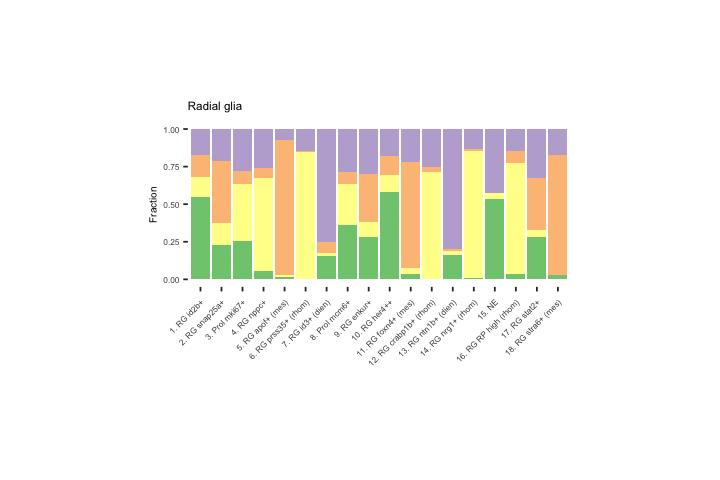

In [21]:
options(repr.plot.width=6, repr.plot.height=4)

p_br_diss

In [22]:
#save figure pdf
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/rg_sub_barplot_regions_setsize.pdf",
       plot = p_br_diss, units = "mm", height = 60, width = 91)

#### Regional specificity for numbered cluster

In [60]:
brain.reg.by.cluster <- table(rg_pool_sub$brain_reg, rg_pool_sub$pc28_res0.8_clusters_numeric_edited)

In [61]:
brain.reg.by.cluster.diss <- brain.reg.by.cluster[c(1:4),]
brain.reg.by.cluster.diss

      
         1   2   3   4   5   6   7   8   9  10  11  20  12  13  14  15  16  17
  dien 159 313 107 107  23  44 198  52  90  29  34   0  30  62  17  72  14  23
  mes  222 990  55  46 452   1  34  25 157  36 182   0   6   2   3   0  13  41
  rhom 113 202 133 242   5 236   4  46  28  17   6   0  80   2 104   6  67   3
  tel  594 397 116  27   5   0  49  78 101 113   6   0   0  15   1 107   4  24
      
        21  18  19
  dien   0   5   0
  mes    0  38   0
  rhom   0   0   0
  tel    0   1   0

In [62]:
# exclude clusters absent from this subset - 19, 20, 21
brain.reg.by.cluster.diss <- brain.reg.by.cluster.diss[,-c(12,19,21)]
brain.reg.by.cluster.diss

      
         1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  dien 159 313 107 107  23  44 198  52  90  29  34  30  62  17  72  14  23   5
  mes  222 990  55  46 452   1  34  25 157  36 182   6   2   3   0  13  41  38
  rhom 113 202 133 242   5 236   4  46  28  17   6  80   2 104   6  67   3   0
  tel  594 397 116  27   5   0  49  78 101 113   6   0  15   1 107   4  24   1

In [63]:
#margin = 1 sums across rows (how is brain reg distributed over clusters)
brain.reg.by.cluster.diss.norm <- round(prop.table(brain.reg.by.cluster.diss, margin = 1), digits = 10)
#brain.reg.by.cluster.norm <- brain.reg.by.cluster.perc1 * 100

In [64]:
brain.reg.by.cluster.diss.norm

      
                  1            2            3            4            5
  dien 0.1153009427 0.2269760696 0.0775924583 0.0775924583 0.0166787527
  mes  0.0963960052 0.4298740773 0.0238818932 0.0199739470 0.1962657403
  rhom 0.0873261206 0.1561051005 0.1027820711 0.1870170015 0.0038639876
  tel  0.3626373626 0.2423687424 0.0708180708 0.0164835165 0.0030525031
      
                  6            7            8            9           10
  dien 0.0319071791 0.1435823060 0.0377084844 0.0652646846 0.0210297317
  mes  0.0004342162 0.0147633521 0.0108554060 0.0681719496 0.0156317846
  rhom 0.1823802164 0.0030911901 0.0355486862 0.0216383308 0.0131375580
  tel  0.0000000000 0.0299145299 0.0476190476 0.0616605617 0.0689865690
      
                 11           12           13           14           15
  dien 0.0246555475 0.0217548949 0.0449601160 0.0123277737 0.0522117476
  mes  0.0790273556 0.0026052974 0.0008684325 0.0013026487 0.0000000000
  rhom 0.0046367852 0.0618238022 0.00154559

In [65]:
#margin = 2 sums across columns (which brain regs make up each cluster) - this is what I need for per cluster calculation
#use as input rowwise normalized data
brain.reg.by.cluster.diss.df <- as.data.frame(round(prop.table(brain.reg.by.cluster.diss.norm, margin = 2), digits = 10))
colnames(brain.reg.by.cluster.diss.df) <- c("Brain.reg", "Cluster", "Fraction")

In [66]:
head(brain.reg.by.cluster.diss.df)

,Brain.reg,Cluster,Fraction
,<fct>,<fct>,<dbl>
1,dien,1,0.1742600
2,mes,1,0.1456880
3,rhom,1,0.1319803
4,tel,1,0.5480717
5,dien,2,0.2150771
6,mes,2,0.4073385


In [67]:
# pallette for brain regions based on https://colorbrewer2.org/#type=qualitative&scheme=Accent&n=5
reg_colors <- c("tel" = "#7fc97f", #green
                "dien" = "#beaed4", #purple
                "mes" = "#fdc086", #orange
                "rhom" = "#ffff99", #yellow
                "whole" = "#386cb0" #blue
                )

In [68]:
p_br_diss <- ggplot(data = brain.reg.by.cluster.diss.df, aes(x = Cluster, y = Fraction, fill = Brain.reg)) +
    geom_bar(stat="identity") + 
    coord_cartesian(ylim = c(0,1)) + 
    labs(x="Cluster", y="Fraction") +  
    theme(axis.title = element_text(size = 18), axis.text = element_text(size = 16),   plot.title = element_text(size = 16, hjust = 0.5), legend.text = element_text(size = 20), legend.title = element_text(size = 22), legend.position = "bottom")  + 
    coord_flip() + 
    scale_fill_manual(values = reg_colors, name = "Brain region", limits = c("tel", "dien", "mes", "rhom")) 

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



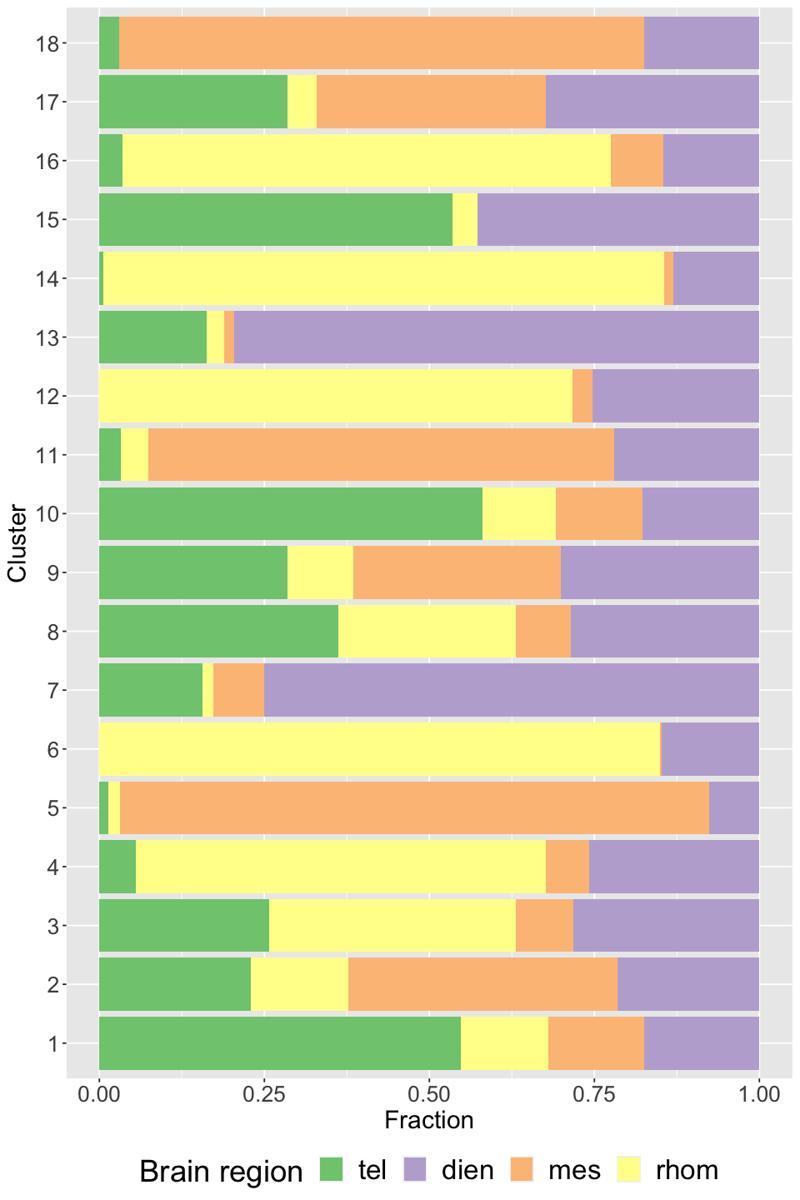

In [69]:
options(repr.plot.width=8, repr.plot.height=12)

p_br_diss

In [70]:
#save figure pdf
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/rg_sub_barplot_regions_s1.pdf",
       plot = p_br_diss, units = "in", height = 12, width = 8)

#### Notch signalling pathway

Plot as individual genes and as module scores (separating the Notch genes from the downstream effectors).

In [4]:
Idents(rg_pool_sub) <- "pc28_res0.8_named_detailed_short"

In [5]:
notch_genes <- c("notch1a", "notch1b", "notch2", "notch3", "maml1", #receptors + coactivator of NICD Mastermind
                                                       "dla", "dlb", "dld", "dll4", "jag1a", "jag1b", "jag2b")
notch_effectors <- c("her4.2", "her4.4", "her15.1", "her6", "her15.2",  #orthologues to hes1/5
                                                       "heyl", "hey1", "hey2" #orthologues to hey
                                                       )
notch_all <- c(notch_genes, notch_effectors)

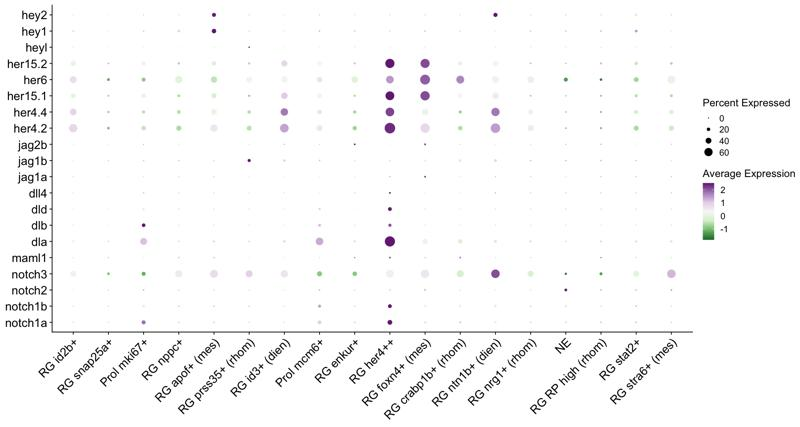

In [9]:
options(repr.plot.width=15, repr.plot.height=8)

dotplot_notch <- DotPlot(rg_pool_sub, features = notch_all, cols = "PRGn") + 
        theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16), axis.title = element_blank()) +
        RotatedAxis() + coord_flip()
dotplot_notch 

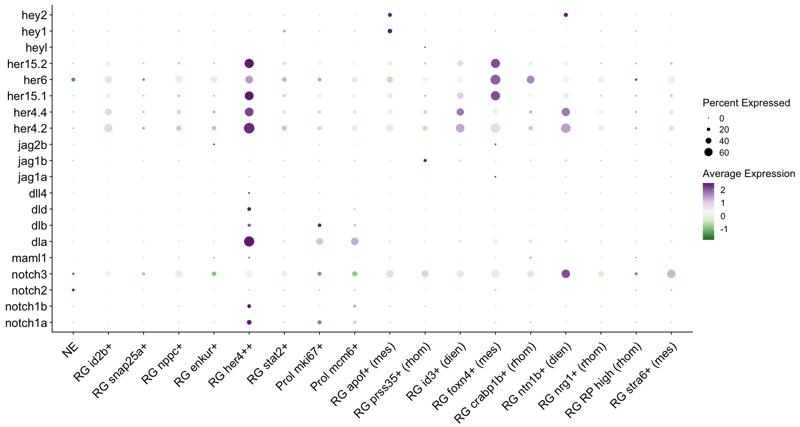

In [10]:
options(repr.plot.width=15, repr.plot.height=8)

# reorder clusters so global and regional are grouped together
dotplot_notch <- DotPlot(rg_pool_sub, features = notch_all, cols = "PRGn") + 
        theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 0.95), axis.text.y = element_text(size = 16), axis.title = element_blank()) +
        scale_y_discrete(limits = c("NE",
                         "RG id2b+",  
                         "RG snap25a+",  
                         "RG nppc+",
                         "RG enkur+", 
                         "RG her4++", 
                         "RG stat2+",           
                         "Prol mki67+",  
                         "Prol mcm6+",
                         "RG apof+ (mes)", 
                         "RG prss35+ (rhom)", 
                         "RG id3+ (dien)", 
                         "RG foxn4+ (mes)", 
                         "RG crabp1b+ (rhom)", 
                         "RG ntn1b+ (dien)", 
                         "RG nrg1+ (rhom)",                 
                         "RG RP high (rhom)",                  
                         "RG stra6+ (mes)")) +
        coord_flip()
dotplot_notch 

In [11]:
#save figure pdf
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/rg_sub_dotplot_notch.pdf", 
       plot = dotplot_notch, units = "in", height = 8, width = 15)

In [76]:
notch_genes

[1] "notch1a" "notch1b" "notch2"  "notch3"  "maml1"   "dla"     "dlb"    
 [8] "dld"     "dll4"    "jag1a"   "jag1b"   "jag2b"

In [77]:
notch_genes_list <- list(notch_genes)

In [78]:
notch_effectors

[1] "her4.2"  "her4.4"  "her15.1" "her6"    "her15.2" "heyl"    "hey1"   
[8] "hey2"

In [79]:
notch_effectors_list <- list(notch_effectors)

In [83]:
rg_pool_sub <- AddModuleScore(rg_pool_sub, features = notch_genes_list, name = "Notch_genes_score")
rg_pool_sub <- AddModuleScore(rg_pool_sub, features = notch_effectors_list, name = "Notch_effectors_score")

In [84]:
str(rg_pool_sub@meta.data)

'data.frame':	15829 obs. of  40 variables:
 $ orig.ident                            : chr  "b1_tel" "b1_tel" "b1_tel" "b1_tel" ...
 $ nCount_RNA                            : num  870 822 662 2128 1073 ...
 $ nFeature_RNA                          : int  428 356 308 804 414 1169 1659 251 1273 1012 ...
 $ multiseq.relative.1.7                 : chr  NA NA NA NA ...
 $ brain_reg                             : chr  "tel" "tel" "tel" "tel" ...
 $ kit_chem                              : chr  "3prim_v1" "3prim_v1" "3prim_v1" "3prim_v1" ...
 $ fixation                              : chr  "fresh" "fresh" "fresh" "fresh" ...
 $ percent.mt                            : num  2.11 0.491 18.2982 0.5429 0.0656 ...
 $ ident                                 : chr  "b1_tel" "b1_tel" "b1_tel" "b1_tel" ...
 $ scDblFinder.class                     : chr  "singlet" "singlet" "singlet" "singlet" ...
 $ scDblFinder.score                     : num  0.0123 0.0873 0.1525 0.4752 0.2686 ...
 $ scDblFinder.weighted    

In [85]:
Idents(rg_pool_sub) <- "pc28_res0.8_named_detailed_short"

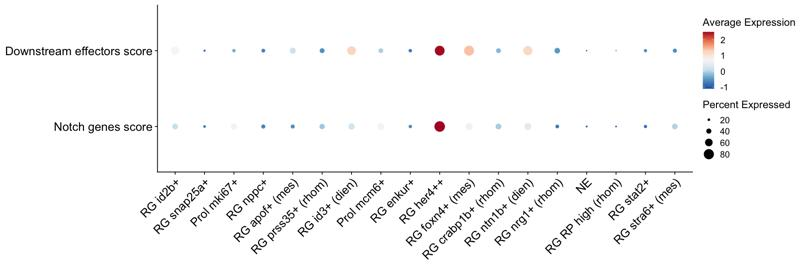

In [86]:
options(repr.plot.width=15, repr.plot.height=5)

dotplot_notch_score <- DotPlot(rg_pool_sub, features = c("Notch_genes_score1", "Notch_effectors_score1"), cols = "RdBu") + 
        theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16), axis.title = element_blank()) +
        scale_x_discrete(breaks = c("Notch_genes_score1", "Notch_effectors_score1"), labels = c("Notch genes score", "Downstream effectors score")) +
        RotatedAxis() + coord_flip()
dotplot_notch_score

In [87]:
#save figure pdf
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/rg_sub_dotplot_notch_score.pdf", plot = dotplot_notch_score, units = "in", height = 5, width = 15)

#### Proliferation score

In [88]:
cc_g2m <- read.csv(file="/local/users/nfresma/zebrafish_G2Mphase_genes.csv", row.names = 1)
g2m.genes <- cc_g2m$x
cc_s <- read.csv(file="/local/users/nfresma/zebrafish_Sphase_genes.csv", row.names = 1)
s.genes <- cc_s$x

rg_pool_sub <- AddModuleScore(rg_pool_sub, features = cc_g2m, name = "G2M_score")
rg_pool_sub <- AddModuleScore(rg_pool_sub, features = cc_s, name = "S_score")

Warning message in file(file, "rt"):
“cannot open file '/local/users/nfresma/zebrafish_G2Mphase_genes.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [89]:
options(repr.plot.width=8, repr.plot.height=4)

FeaturePlot(object = rg_pool_sub, reduction = 'umap', features = c("G2M_score1", "S_score1") , cols = c("lightgrey","mediumblue"), label=F)

Warning message in FetchData.Seurat(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: G2M_score1, S_score1”


ERROR: Error: None of the requested features were found: G2M_score1, S_score1 in slot data


In [70]:
Idents(rg_pool_sub) <- "pc28_res0.8_named_detailed_short"

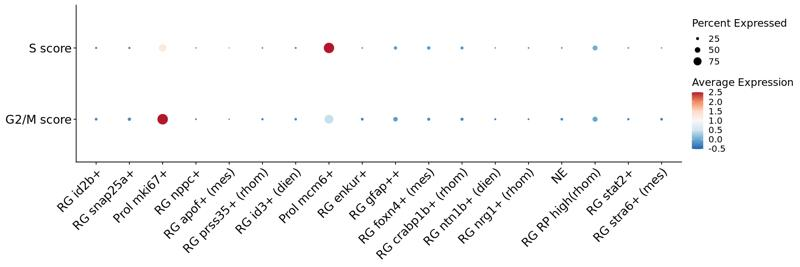

In [71]:
options(repr.plot.width=15, repr.plot.height=5)

dotplot_prol <- DotPlot(rg_pool_sub, features = c("G2M_score1", "S_score1"), cols = "RdBu") + 
        theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16), axis.title = element_blank()) +
        scale_x_discrete(breaks = c("G2M_score1", "S_score1"), labels = c("G2/M score", "S score")) +
        RotatedAxis() + coord_flip()
dotplot_prol

In [72]:
#save figure pdf
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/rg_sub_dotplot_prol.pdf", plot = dotplot_prol, units = "in", height = 5, width = 15)

In [100]:
RColorBrewer::brewer.pal.info

,maxcolors,category,colorblind
,<dbl>,<chr>,<lgl>
BrBG,11,div,TRUE
PiYG,11,div,TRUE
PRGn,11,div,TRUE
PuOr,11,div,TRUE
RdBu,11,div,TRUE
RdGy,11,div,FALSE
RdYlBu,11,div,TRUE
RdYlGn,11,div,FALSE
Spectral,11,div,FALSE


NEW VERSION: updated gene list! 

In [90]:
cc_g2m <- read.csv(file="/local/Nina/jupyterlab/brains_trans/cc_genes/cc_genes_g2m_zebrafish.txt")
g2m.genes <- cc_g2m$x
cc_s <- read.csv(file="/local/Nina/jupyterlab/brains_trans/cc_genes/cc_genes_s_zebrafish.txt")
s.genes <- cc_s$x

In [91]:
g2m.genes

[1] "hmgb2a"            "cdk1"              "nusap1"           
 [4] "ube2c"             "birc5a"            "tpx2"             
 [7] "top2a"             "ndc80"             "CKS2"             
[10] "nuf2"              "cks1b"             "mki67"            
[13] "tmpoa"             "tmpob"             "cenpf"            
[16] "tacc3"             "smc4"              "ccnb2"            
[19] "ckap2l"            "si:ch211-266i6.3"  "aurkb"            
[22] "bub1"              "kif11"             "anp32e"           
[25] "tubb4b"            "zgc:65894"         "TUBB4B"           
[28] "zgc:153426"        "gtse1"             "kif20bb"          
[31] "kif20ba"           "si:ch211-69g19.2"  "cdc20"            
[34] "ttk"               "rangap1a"          "rangap1b"         
[37] "ncapd2"            "dlgap5"            "si:ch211-244o22.2"
[40] "cdca8"             "ect2"              "kif23"            
[43] "hmmr"              "aurka"             "anln"             
[46] "lbr"               "ckap5"             "cenpe"            
[49] "ctcf"              "nek2"              "g2e3"             
[52] "gas2l3"            "cbx5"              "selenoh"

In [92]:
rg_pool_sub <- AddModuleScore(rg_pool_sub, features = cc_g2m, name = "G2M_score")
rg_pool_sub <- AddModuleScore(rg_pool_sub, features = cc_s, name = "S_score")

Warning message:
“The following features are not present in the object: TUBB4B, not searching for symbol synonyms”


In [93]:
str(rg_pool_sub@meta.data)

'data.frame':	15829 obs. of  42 variables:
 $ orig.ident                            : chr  "b1_tel" "b1_tel" "b1_tel" "b1_tel" ...
 $ nCount_RNA                            : num  870 822 662 2128 1073 ...
 $ nFeature_RNA                          : int  428 356 308 804 414 1169 1659 251 1273 1012 ...
 $ multiseq.relative.1.7                 : chr  NA NA NA NA ...
 $ brain_reg                             : chr  "tel" "tel" "tel" "tel" ...
 $ kit_chem                              : chr  "3prim_v1" "3prim_v1" "3prim_v1" "3prim_v1" ...
 $ fixation                              : chr  "fresh" "fresh" "fresh" "fresh" ...
 $ percent.mt                            : num  2.11 0.491 18.2982 0.5429 0.0656 ...
 $ ident                                 : chr  "b1_tel" "b1_tel" "b1_tel" "b1_tel" ...
 $ scDblFinder.class                     : chr  "singlet" "singlet" "singlet" "singlet" ...
 $ scDblFinder.score                     : num  0.0123 0.0873 0.1525 0.4752 0.2686 ...
 $ scDblFinder.weighted    

In [94]:
Idents(rg_pool_sub) <- "pc28_res0.8_named_detailed_short"

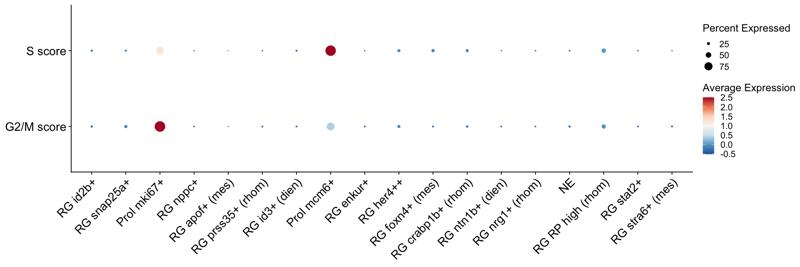

In [95]:
options(repr.plot.width=15, repr.plot.height=5)

dotplot_prol <- DotPlot(rg_pool_sub, features = c("G2M_score1", "S_score1"), cols = "RdBu") + 
        theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16), axis.title = element_blank()) +
        scale_x_discrete(breaks = c("G2M_score1", "S_score1"), labels = c("G2/M score", "S score")) +
        RotatedAxis() + coord_flip()
dotplot_prol

In [96]:
#save figure pdf
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/rg_sub_dotplot_prol.pdf", plot = dotplot_prol, units = "in", height = 5, width = 15)

#### Joint plot for Notch and proliferation scores

In [97]:
Idents(rg_pool_sub) <- "pc28_res0.8_named_detailed_short"

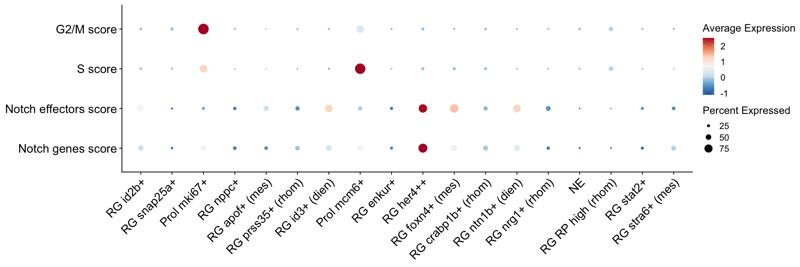

In [98]:
options(repr.plot.width=15, repr.plot.height=5)

dotplot_prol_notch <- DotPlot(rg_pool_sub, features = c("Notch_genes_score1", "Notch_effectors_score1", "S_score1", "G2M_score1"), cols = "RdBu") + 
        theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16), axis.title = element_blank()) +
        scale_x_discrete(breaks = c("Notch_genes_score1", "Notch_effectors_score1", "S_score1", "G2M_score1"), labels = c("Notch genes score", "Notch effectors score", "S score", "G2/M score")) +
        RotatedAxis() + coord_flip()
dotplot_prol_notch

In [99]:
table(rg_pool_sub$pc28_res0.8_named_detailed_short)


              RG id2b+            RG snap25a+            Prol mki67+ 
                  2648                   3180                   1248 
              RG nppc+         RG apof+ (mes)      RG prss35+ (rhom) 
                  1155                   1690                    880 
        RG id3+ (dien)             Prol mcm6+              RG enkur+ 
                   745                    659                    637 
             RG her4++        RG foxn4+ (mes)     RG crabp1b+ (rhom) 
                   630                    500                    407 
      RG ntn1b+ (dien)        RG nrg1+ (rhom)                     NE 
                   386                    384                    234 
     RG RP high (rhom)              RG stat2+        RG stra6+ (mes) 
                   232                    139                     75 
             RG cd74a+ RG atp1b1b+ (tel/dien)                Prol 5' 
                     0                      0                      0 

Warning message:
“Removed 4 rows containing missing values (geom_point).”


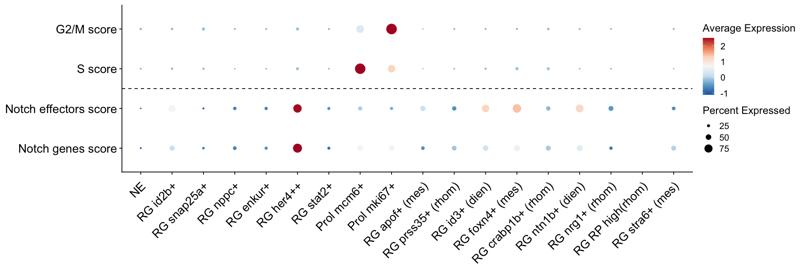

In [100]:
#version with reordered clusters into regional-to-global
options(repr.plot.width=15, repr.plot.height=5)

dotplot_prol_notch <- DotPlot(rg_pool_sub, features = c("Notch_genes_score1", "Notch_effectors_score1", "S_score1", "G2M_score1"), cols = "RdBu") + 
        theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 0.95), axis.text.y = element_text(size = 16), axis.title = element_blank()) +
        scale_x_discrete(breaks = c("Notch_genes_score1", "Notch_effectors_score1", "S_score1", "G2M_score1"), labels = c("Notch genes score", "Notch effectors score", "S score", "G2/M score")) +
        scale_y_discrete(limits = c("NE", "RG id2b+", "RG snap25a+", "RG nppc+", "RG enkur+", "RG her4++", "RG stat2+", #global
                                   "Prol mcm6+", "Prol mki67+", #globl prol
                                   "RG apof+ (mes)", "RG prss35+ (rhom)", "RG id3+ (dien)", "RG foxn4+ (mes)", 
                                    "RG crabp1b+ (rhom)", "RG ntn1b+ (dien)", "RG nrg1+ (rhom)", "RG RP high(rhom)", "RG stra6+ (mes)" #regional
                                   )) +
        geom_vline(xintercept=2.5, linetype="dashed") +
        RotatedAxis() + coord_flip()
dotplot_prol_notch


In [101]:
#save figure pdf
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/rg_sub_dotplot_prol_notch.pdf", 
       plot = dotplot_prol_notch, units = "in", height = 5, width = 15)

Warning message:
“Removed 4 rows containing missing values (geom_point).”


#### Cluster-specific markers dotplot

In [12]:
# record genes with specific spatial expression for each cluster (unique and shared with other clusters)
unique_markers <- list()
unique_markers[["cluster_0"]] <- c("id2b", "zgc:153704", "arl5c", "lipg", "foxg1a") #high fos/jun as well
unique_markers[["cluster_1"]] <- c("epd") # one of few almost unique markers and it indicates contamination
unique_markers[["cluster_2"]] <- c("hmgn2", "hmgb2a", "mki67", "top2a", "nusap1", "tuba8l", "cenpf")
unique_markers[["cluster_3"]] <- c("slc7a10a", "nppc", "endouc", "itih1")
unique_markers[["cluster_4"]] <- c() #none unique but many shared with 8 exclusively - potential merge
unique_markers[["cluster_5"]] <- c() #most look like contamination from other cell types, similar to 1
unique_markers[["cluster_6"]] <- c("prss35", "sept5a", "myo18aa", "gria4a", "tagln2", "svep1", "gpr37l1a", "spock3")
unique_markers[["cluster_7"]] <- c("slc16a9a", "pimr207", "sulf1", "aoc2", "fezf2")
unique_markers[["cluster_8"]] <- c() #high overlap with 4 but some with other clusters & 4 excluded
unique_markers[["cluster_9"]] <- c("mcm2", "hells", "mcm6", "cdca7a", "mcm5", "npm1a")
unique_markers[["cluster_10"]] <- c("foxj1a", "enkur", "anxa2a", "smkr1", "tbata", "meig1")
unique_markers[["cluster_11"]] <- c("INAVA") #few unique, high overlap with rgghbouring
unique_markers[["cluster_12"]] <- c("si:ch211-69b22.5", "col15a1b", "foxn4", "zic6", "adcyap1b", "cep112") 
unique_markers[["cluster_13"]] <- c("atp1b1b") #strange cluster - distinct on UMAP but very few if any unique markers - also very high on batch effect (fixed cells)
unique_markers[["cluster_14"]] <- c("crabp1b", "ace", "waplb", "msx3", "msx1b")
unique_markers[["cluster_15"]] <- c("sema3b", "nr2f2", "nr2f1b", "scube1", "nkd1")
unique_markers[["cluster_16"]] <- c("hapln4", "nrg1", "sema4bb", "nav2b")
unique_markers[["cluster_17"]] <- c("rbp4", "clu", "fabp7b", "krt18", "cyr61", "slc13a1") 
unique_markers[["cluster_18"]] <- c() #high RPs only - good candidate for merge into 0 or 1
unique_markers[["cluster_19"]] <- c("zgc:123068", "isg15", "rsad2") #look into merge options
unique_markers[["cluster_20"]] <- c() #merge
unique_markers[["cluster_21"]] <- c("HIST1H4E") #probably batcg effect
unique_markers[["cluster_22"]] <- c("aldh1a2", "cyp27c1", "stra6")
unique_markers[["cluster_23"]] <- c("pfn1", "ccr9a", "cxcr4b", "cd74a") #immune doublets?


In [13]:
# shared across multiple
shared_markers <- list()
shared_markers[["cluster_0"]] <- c("si:ch211-251b21.1", "grm2b", "mcl1a", "cebpd", "luzp2")
shared_markers[["cluster_1"]] <- c("snap25a", "tmsb2", "si:dkey-238o13.4", "snap25b", "calm2a", "vamp5")
shared_markers[["cluster_2"]] <- c("pcna")
shared_markers[["cluster_3"]] <- c("stm", "slc6a11b", "slc6a9", "gpd1b", "cd81b", "cd99", "smox", "slc4a4a", "crabp1a")
shared_markers[["cluster_4"]] <- c("apof", "robo4", "zgc:109949", "zgc:165461", "slc6a1b", "mgll", "ndrg3a", "eno1b", "vamp5", "si:dkey-238o13.4")
shared_markers[["cluster_5"]] <- c("mbpa", "epd", "cd59", "apoc1", "plp1b", "mpz", "cd74a", "hbba1.1") #mostly shared with 1
shared_markers[["cluster_6"]] <- c("si:dkey-183j2.10", "kctd12.2", "ttyh3b", "cadm4")
shared_markers[["cluster_7"]] <- c("AL954697.1", "id3", "porb", "her9", "her4.1", "her4.4", "nkx2.4b", "nkx2.4a")
shared_markers[["cluster_8"]] <- c("slc6a1b", "cited4b", "si:dkey-238o13.4", "robo4", "scg3", "apof", "mab21l2", "slc38a3a", "her4.1", "mfge8a", "bag3", "cyp26b1")
shared_markers[["cluster_9"]] <- c("pcna", "stmn1a", "hmgb2b")
shared_markers[["cluster_10"]] <- c("vim", "gfap")
shared_markers[["cluster_11"]] <- c("dla", "her15.2", "her4.2", "elavl3", "ascl1a", "sox11b", "ccnd1", "sox4a.1", "sox11a", "foxg1a")
shared_markers[["cluster_12"]] <- c("igfbp5b", "fsta", "tenm3", "hspb1", "socs3a", "btg2", "her15.2", "draxin", "cebpd", "boc")
shared_markers[["cluster_13"]] <- c("rn7sk", "angptl4", "her9", "atf3", "vim")
shared_markers[["cluster_14"]] <- c("si:dkey-183j2.10", "gdf10a", "cntfr", "ccnd2a", "b3gnt7l", "waplb")
shared_markers[["cluster_15"]] <- c("ntn1b", "foxp4", "fsta", "fgfr3", "nkx2.4b", "nkx2.4a")
shared_markers[["cluster_16"]] <- c("rhbg", "kctd12.2", "proca1", "slc7a2", "scg3", "laptm4b", "cyp26b1", "aqp1a.1")
shared_markers[["cluster_17"]] <- c()
shared_markers[["cluster_18"]] <- c("rps26l", "rps12", "rpl12", "rps29") #they in fact label all clusters - look 1-on-1 for something more specific!! or merge with 0 or 1
shared_markers[["cluster_19"]] <- c("pnp6", "luzp2", "lgals2a")
shared_markers[["cluster_20"]] <- c() # nothing specific - look into merge
shared_markers[["cluster_21"]] <- c() # another NB, like 2
shared_markers[["cluster_22"]] <- c("rdh10a", "igfbp5b", "scg3", "rbp5", "crabp1a", "aoc2")
shared_markers[["cluster_23"]] <- c()

In [14]:
unique_markers_vector <- unlist(unique_markers)
unique_markers_vector <- unname(unique_markers_vector)
head(unique_markers_vector)

[1] "id2b"       "zgc:153704" "arl5c"      "lipg"       "foxg1a"    
[6] "epd"

In [15]:
shared_markers_vector <- unlist(shared_markers)
shared_markers_vector <- unname(shared_markers_vector)
#remove duplicates
shared_markers_vector <- unique(shared_markers_vector)
head(shared_markers_vector)

[1] "si:ch211-251b21.1" "grm2b"             "mcl1a"            
[4] "cebpd"             "luzp2"             "snap25a"

In [16]:
# plot together
all_markers_vector <- c(unique_markers_vector, shared_markers_vector)
all_markers_vector <- unique(all_markers_vector)

In [102]:
Idents(rg_pool_sub) <- "pc28_res0.8_clusters_numeric_edited"

In [103]:
table(rg_pool_sub@active.ident)


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2648 3180 1248 1155 1690  880  745  659  637  630  500  407  386  384  234  232 
  17   18 
 139   75 

In [104]:
options(repr.plot.width=15, repr.plot.height=40)

dotplot_all <- DotPlot(rg_pool_sub, features = all_markers_vector, cols = "PRGn") + 
        theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16)) + 
        RotatedAxis() +
        coord_flip()
dotplot_all

ERROR: Error in DotPlot(rg_pool_sub, features = all_markers_vector, cols = "PRGn"): object 'all_markers_vector' not found


In [105]:
options(repr.plot.width=40, repr.plot.height=15)

#normal orientation (horizontal)
dotplot_all <- DotPlot(rg_pool_sub, features = all_markers_vector, cols = "PRGn") + 
        theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16)) + 
        RotatedAxis() 
dotplot_all

ERROR: Error in DotPlot(rg_pool_sub, features = all_markers_vector, cols = "PRGn"): object 'all_markers_vector' not found


In [106]:
#save figure pdf
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/rg_sub_dotplot_all_unsorted.pdf",
       plot = dotplot_all, units = "in", height = 12, width = 40)

ERROR: Error in plot_theme(plot): object 'dotplot_all' not found


Warning message in FetchData(object = object, vars = features, cells = cells):
“The following requested variables were not found: si:ch21169b22.5, ndk1, ”


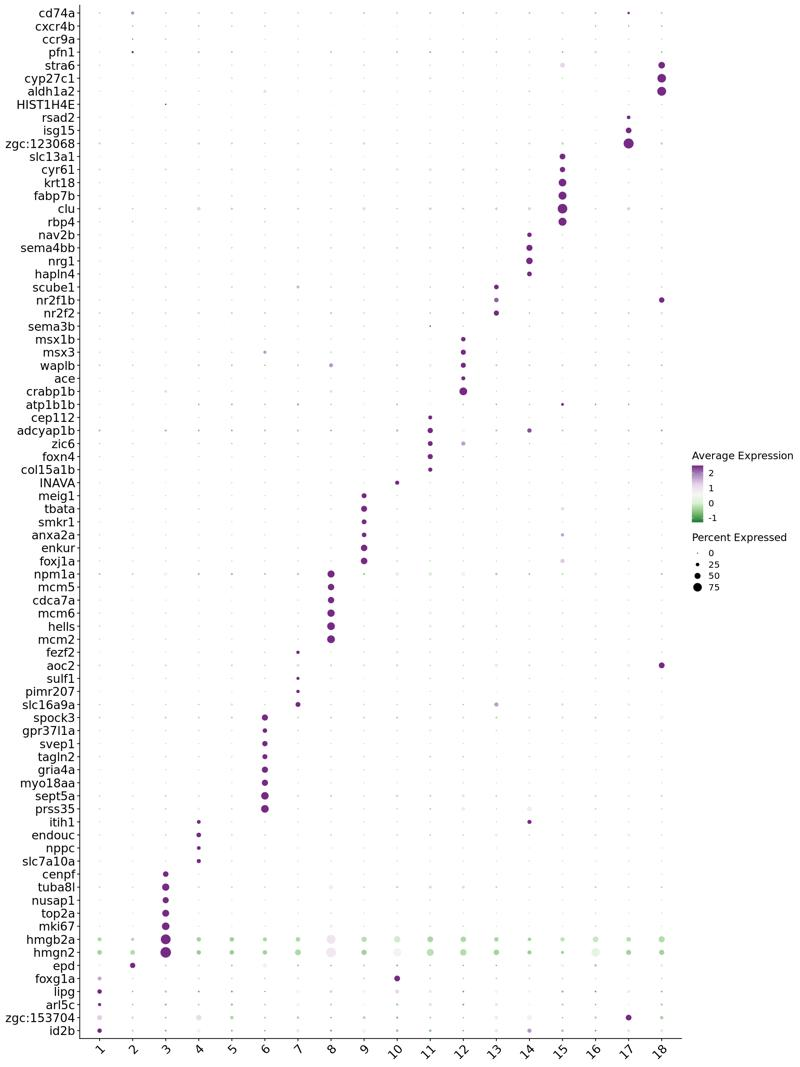

In [194]:
options(repr.plot.width=15, repr.plot.height=20)

dotplot_unique <- DotPlot(rg_pool_sub, features = unique_markers_vector, cols = "PRGn") + 
        theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16), axis.title = element_blank()) + 
        RotatedAxis() +
        coord_flip()
dotplot_unique

In [195]:
#save figure pdf
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/rg_sub_dotplot_unique.pdf",
       plot = dotplot_unique, units = "in", height = 20, width = 15)

#### Cluster-specific markers dotplot final

In [6]:
# more curated list of markers for the final object
# to match the supplemental table of marker genes
final_markers <- list()
final_markers[["cluster_1"]] <- c("id2b", "arl5c", "lipg", "zgc:153704", "foxg1a") 
final_markers[["cluster_2"]] <- c("snap25a", "tmsb2", "snap25b" , "epd", "mbpa", "cd59", "apoc1", "plp1b")
final_markers[["cluster_3"]] <- c("hmgn2", "hmgb2a", "tuba8l", "mki67", "top2a", "nusap1", "cenpf", "pcna", "stmn1a", "hmgb2b")
final_markers[["cluster_4"]] <- c("endouc", "slc7a10a", "nppc", "itih1", "slc6a1b", "ndrg3a") 
final_markers[["cluster_5"]] <- c("si:dkey-238o13.4", "si:dkey−238o13.4", "apof", "mfge8a","zgc:109949", "zgc:165461", "mgll", "robo4", "slc6a1b", "ndrg3a", "cyp26b1") 
final_markers[["cluster_6"]] <- c("prss35", "sept5a", "myo18aa", "gria4a", "tagln2", "svep1", "gpr37l1a", "spock3")
final_markers[["cluster_7"]] <- c("AL954697.1", "id3", "porb", "pimr207", "sulf1", "fezf2", "her9", "her4.1", "her4.4", "slc16a9a", "nkx2.4b", "nkx2.4a")
final_markers[["cluster_8"]] <- c("mcm2", "hells", "mcm6", "cdca7a", "mcm5", "npm1a", "pcna" , "stmn1a", "hmgb2b") 
final_markers[["cluster_9"]] <- c("foxj1a", "enkur", "anxa2a", "smkr1", "tbata", "meig1", "vim")
final_markers[["cluster_10"]] <- c("gfap", "INAVA", "foxg1a", "her9", "her4.1", "her4.4")
final_markers[["cluster_11"]] <- c("si:ch211-69b22.5", "si:ch211−69b22.5", "col15a1b", "foxn4", "cep112", "zic6", "adcyap1b", "cebpd") 
final_markers[["cluster_12"]] <- c("crabp1b", "ace", "waplb", "msx3", "msx1b", "zic6", "gdf10a", "cntfr", "ccnd2a", "b3gnt7l") 
final_markers[["cluster_13"]] <- c("ntn1b", "foxp4", "fgfr3", "nr2f2", "scube1", "nkd1", "nr2f1b", "nkx2.4b", "nkx2.4a", "her9", "her4.1", "her4.4")
final_markers[["cluster_14"]] <- c("hapln4", "nrg1", "sema4bb", "nav2b", "rhbg", "proca1", "slc7a2", "laptm4b", "aqp1a.1", "itih1", "adcyap1b", "cyp26b1")
final_markers[["cluster_15"]] <- c("clu", "rbp4", "fabp7b", "krt18", "cyr61", "angptl4", "vim")
final_markers[["cluster_16"]] <- c("rps26l", "rps12", "rpl12", "rps29")
final_markers[["cluster_17"]] <- c("lgals2a", "pnp6",  "stat2", "isg15", "rsad2", "zgc:123068", "zgc:153704") 
final_markers[["cluster_18"]] <- c("aldh1a2", "cyp27c1", "stra6", "rdh10a", "rbp5", "aoc2", "scube1")

In [7]:
final_markers_vector <- unlist(final_markers)
final_markers_vector <- unname(final_markers_vector)
final_markers_vector <- unique(final_markers_vector)
length(final_markers_vector)
head(final_markers_vector)

[1] 128

[1] "id2b"       "arl5c"      "lipg"       "zgc:153704" "foxg1a"    
[6] "snap25a"

Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
“The following requested variables were not found: si:dkey−238o13.4, si:ch211−69b22.5”


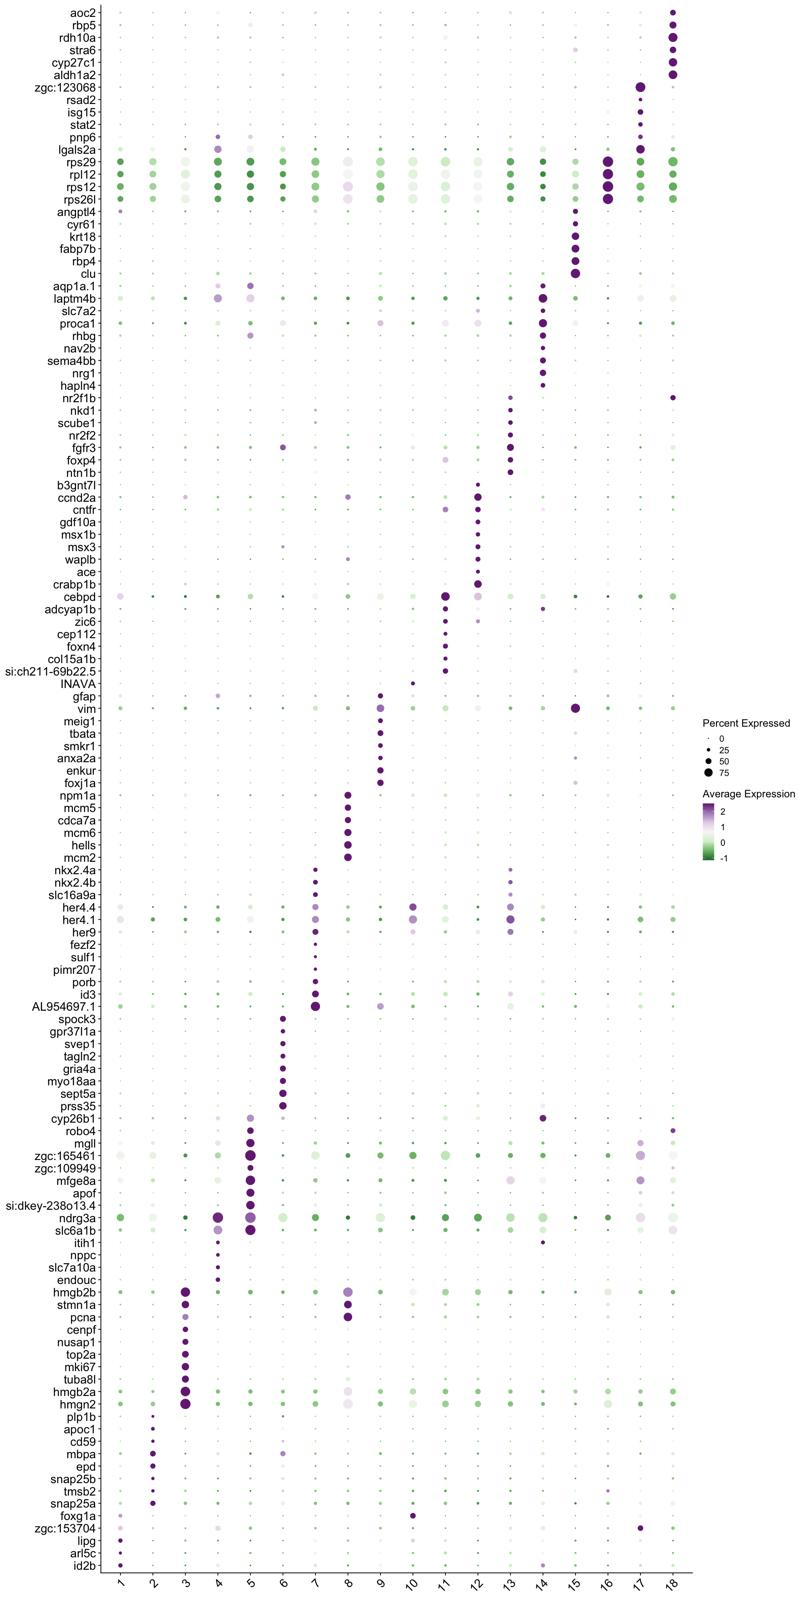

In [8]:
options(repr.plot.width=15, repr.plot.height=30)

dotplot_final <- DotPlot(rg_pool_sub, features = final_markers_vector, cols = "PRGn") + 
        theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16), axis.title = element_blank()) + 
        RotatedAxis() +
        coord_flip()
dotplot_final

In [9]:
#save figure pdf
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/rg_sub_dotplot_final_supp.pdf",
       plot = dotplot_final, units = "in", height = 25, width = 15)

In [30]:
# I wanted to add the general markers (for all radial glia as a group) to the DotPlot to contrast the cluster specific ones
# however due to scaling many of the pan-RG markers now look like more specific 
# do not show in this plot, rather in Fig 1 with the whole dataset (where scaling includes non RG types too)

general_markers_vector <- c("fabp7a", "s100b", "id1", "glula")

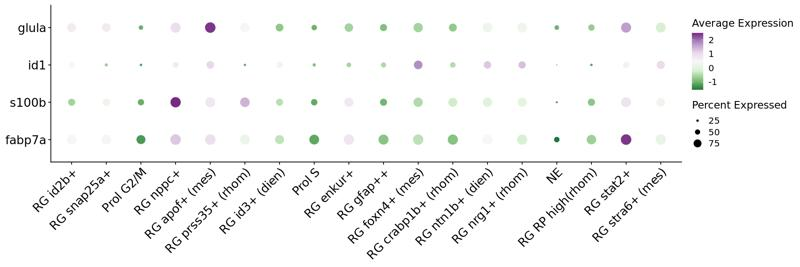

In [34]:
options(repr.plot.width=15, repr.plot.height=5)

dotplot_general <- DotPlot(rg_pool_sub, features = general_markers_vector, cols = "PRGn") + 
        theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16), axis.title = element_blank()) + 
        RotatedAxis() +
        coord_flip()
dotplot_general

### Export annotation (detailed cell types)

For consistency (so that I have detailed ID for all cells shown in Fig1B) I will export IDs for the cells of rg_pool, rather than only the subset of curated cells (with doublets and batchy clusters excluded). But I add a column to the metadata table to indicate the clusters flagged for exclusion more clearly.  

In [109]:
dim(rg_pool_sub)

[1] 24332 15829

In [110]:
str(rg_pool@meta.data)

'data.frame':	16387 obs. of  38 variables:
 $ orig.ident                            : chr  "b1_tel" "b1_tel" "b1_tel" "b1_tel" ...
 $ nCount_RNA                            : num  870 822 662 2128 1073 ...
 $ nFeature_RNA                          : int  428 356 308 804 414 1169 680 1659 251 1273 ...
 $ multiseq.relative.1.7                 : chr  NA NA NA NA ...
 $ brain_reg                             : chr  "tel" "tel" "tel" "tel" ...
 $ kit_chem                              : chr  "3prim_v1" "3prim_v1" "3prim_v1" "3prim_v1" ...
 $ fixation                              : chr  "fresh" "fresh" "fresh" "fresh" ...
 $ percent.mt                            : num  2.11 0.491 18.2982 0.5429 0.0656 ...
 $ ident                                 : chr  "b1_tel" "b1_tel" "b1_tel" "b1_tel" ...
 $ scDblFinder.class                     : chr  "singlet" "singlet" "singlet" "singlet" ...
 $ scDblFinder.score                     : num  0.0123 0.0873 0.1525 0.4752 0.2686 ...
 $ scDblFinder.weighted     

In [111]:
rg_pool_ann <- data.frame("Barcode" = rg_pool@assays$RNA@counts@Dimnames[[2]],
                          "Orig_ident" = rg_pool$orig.ident,
                           "Brain_reg_lib" = rg_pool$brain_reg,
                           "Fixation" = rg_pool$fixation,
                          "Celltype_major" = rg_pool$major_celltypes_pc28_res0.6,
                           "Celltype_detailed" = rg_pool$pc28_res0.8_named_detailed,
                           "Celltype_detailed_short" = rg_pool$pc28_res0.8_named_detailed_short,
                          "Keep_in_final" = TRUE,
                          "Region_simple" = rg_pool$pc28_res0.8_regional_simple_prol, #with 4 categories incl global prol.
                          "Region_detailed" = rg_pool$pc28_res0.8_regional_detailed,
                          "Region_score_max" = rg_pool$pc28_res0.8_max_fraction,
                          "Region_score_max_name" = rg_pool$pc28_res0.8_region_max_fraction,
                          "Region_score_tel" = rg_pool$pc28_res0.8_fraction_tel,
                          "Region_score_dien" = rg_pool$pc28_res0.8_fraction_dien,
                          "Region_score_mes" = rg_pool$pc28_res0.8_fraction_mes,
                          "Region_score_rhom" = rg_pool$pc28_res0.8_fraction_rhom
                          )

head(rg_pool_ann)

,Barcode,Orig_ident,Brain_reg_lib,Fixation,Celltype_major,Celltype_detailed,Celltype_detailed_short,Keep_in_final,Region_simple,Region_detailed,Region_score_max,Region_score_max_name,Region_score_tel,Region_score_dien,Region_score_mes,Region_score_rhom
,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<lgl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
B1.T_AAACATTGGAGCTT-1,B1.T_AAACATTGGAGCTT-1,b1_tel,tel,fresh,Radial glia,Radial glia snap25a+,RG snap25a+,TRUE,Global,Multi,0.43,mes_0.43,0.23,0.18,0.43,0.16
B1.T_AAAGCAGAGCGATT-1,B1.T_AAAGCAGAGCGATT-1,b1_tel,tel,fresh,Radial glia,Radial glia id2b+,RG id2b+,TRUE,Global,Multi,0.55,tel_0.55,0.55,0.15,0.16,0.14
B1.T_AAATACTGGTTGCA-1,B1.T_AAATACTGGTTGCA-1,b1_tel,tel,fresh,Radial glia,Proliferating cells mki67+,Prol mki67+,TRUE,Global prol.,Multi,0.40,rhom_0.4,0.26,0.25,0.09,0.40
B1.T_AACAATACTACTGG-1,B1.T_AACAATACTACTGG-1,b1_tel,tel,fresh,Radial glia,Radial glia id2b+,RG id2b+,TRUE,Global,Multi,0.55,tel_0.55,0.55,0.15,0.16,0.14
B1.T_AACACGTGCATGCA-1,B1.T_AACACGTGCATGCA-1,b1_tel,tel,fresh,Radial glia,Radial glia id2b+,RG id2b+,TRUE,Global,Multi,0.55,tel_0.55,0.55,0.15,0.16,0.14
B1.T_AACAGAGAGCTACA-1,B1.T_AACAGAGAGCTACA-1,b1_tel,tel,fresh,Radial glia,Radial glia id2b+,RG id2b+,TRUE,Global,Multi,0.55,tel_0.55,0.55,0.15,0.16,0.14


In [112]:
rg_pool_ann[which(rg_pool_ann$Celltype_detailed == "Radial glia cd74a+"),]$Keep_in_final <- FALSE
rg_pool_ann[which(rg_pool_ann$Celltype_detailed == "Radial glia atp1b1b+ (tel/dien)"),]$Keep_in_final <- FALSE
rg_pool_ann[which(rg_pool_ann$Celltype_detailed == "Proliferating cells 5'"),]$Keep_in_final <- FALSE
table(rg_pool_ann$Keep_in_final)


FALSE  TRUE 
  558 15829 

In [113]:
write.csv(rg_pool_ann, file = "/local/Nina/jupyterlab/brains_trans/ann_rg_pool_reg_28pcs_res0-8.csv")

### Export annotation (detailed cell types)

In [51]:
str(rg_pool_sub@meta.data)

'data.frame':	15829 obs. of  32 variables:
 $ orig.ident                          : chr  "b1_tel" "b1_tel" "b1_tel" "b1_tel" ...
 $ nCount_RNA                          : num  870 822 662 2128 1073 ...
 $ nFeature_RNA                        : int  428 356 308 804 414 1169 1659 251 1273 1012 ...
 $ multiseq.relative.1.7               : chr  NA NA NA NA ...
 $ brain_reg                           : chr  "tel" "tel" "tel" "tel" ...
 $ kit_chem                            : chr  "3prim_v1" "3prim_v1" "3prim_v1" "3prim_v1" ...
 $ fixation                            : chr  "fresh" "fresh" "fresh" "fresh" ...
 $ percent.mt                          : num  2.11 0.491 18.2982 0.5429 0.0656 ...
 $ ident                               : chr  "b1_tel" "b1_tel" "b1_tel" "b1_tel" ...
 $ scDblFinder.class                   : chr  "singlet" "singlet" "singlet" "singlet" ...
 $ scDblFinder.score                   : num  0.0123 0.0873 0.1525 0.4752 0.2686 ...
 $ scDblFinder.weighted                : num  0.1

In [74]:
#version 2

rg_pool_ann <- data.frame("Barcode" = rg_pool@assays$RNA@counts@Dimnames[[2]],
                          "Orig_ident" = rg_pool$orig.ident,
                           "Brain_reg_lib" = rg_pool$brain_reg,
                           "Fixation" = rg_pool$fixation,
                          "Celltype_major" = rg_pool$major_celltypes_pc28_res0.6,
                           "Celltype_detailed" = rg_pool$pc28_res0.8_named_detailed,
                           "Celltype_detailed_short" = rg_pool$pc28_res0.8_named_detailed_short,
                          "Region_simple" = rg_pool$pc28_res0.8_regional_simple,
                          "Region_detailed" = rg_pool$pc28_res0.8_regional_detailed,
                          "Region_score" = rg_pool$pc28_res0.8_regional_score
                          )

head(rg_pool_ann)

ERROR: Error: Cannot find 'pc28_res0.8_regional_score' in this Seurat object


In [ ]:
# version 2
#write.csv(rg_pool_ann, file = "/local/Nina/jupyterlab/brains_trans/ann_rg_pool_reg_28pcs_res0-8.csv")

### Replot BR with names

In [275]:
brain.reg.by.cluster <- table(rg_pool_sub$brain_reg, rg_pool_sub$pc28_res0.8_named_detailed_short)

In [276]:
brain.reg.by.cluster.diss <- brain.reg.by.cluster[c(1:4),]
brain.reg.by.cluster.diss

      
       RG id2b+ RG/neu Prol G2/M RG nppc+ RG apof+ (mes) RG prss35+ (rhom)
  dien      159    313       107      107             23                44
  mes       222    990        55       46            452                 1
  rhom      113    202       133      242              5               236
  tel       594    397       116       27              5                 0
      
       RG id3+ (dien) Prol S RG enkur+ RG gfap++ RG foxn4+ (mes)
  dien            198     52        90        29              34
  mes              34     25       157        36             182
  rhom              4     46        28        17               6
  tel              49     78       101       113               6
      
       RG crabp1b+ (rhom) RG ntn1b+ (dien) RG nrg1+ (rhom)  NE RG RP high(rhom)
  dien                 30               62              17  72               14
  mes                   6                2               3   0               13
  rhom                 80              

In [277]:
#margin = 1 sums across rows (how is brain reg distributed over clusters)
brain.reg.by.cluster.diss.norm <- round(prop.table(brain.reg.by.cluster.diss, margin = 1), digits = 10)
#brain.reg.by.cluster.norm <- brain.reg.by.cluster.perc1 * 100

In [278]:
brain.reg.by.cluster.diss.norm

      
           RG id2b+       RG/neu    Prol G2/M     RG nppc+ RG apof+ (mes)
  dien 0.1153009427 0.2269760696 0.0775924583 0.0775924583   0.0166787527
  mes  0.0963960052 0.4298740773 0.0238818932 0.0199739470   0.1962657403
  rhom 0.0873261206 0.1561051005 0.1027820711 0.1870170015   0.0038639876
  tel  0.3626373626 0.2423687424 0.0708180708 0.0164835165   0.0030525031
      
       RG prss35+ (rhom) RG id3+ (dien)       Prol S    RG enkur+    RG gfap++
  dien      0.0319071791   0.1435823060 0.0377084844 0.0652646846 0.0210297317
  mes       0.0004342162   0.0147633521 0.0108554060 0.0681719496 0.0156317846
  rhom      0.1823802164   0.0030911901 0.0355486862 0.0216383308 0.0131375580
  tel       0.0000000000   0.0299145299 0.0476190476 0.0616605617 0.0689865690
      
       RG foxn4+ (mes) RG crabp1b+ (rhom) RG ntn1b+ (dien) RG nrg1+ (rhom)
  dien    0.0246555475       0.0217548949     0.0449601160    0.0123277737
  mes     0.0790273556       0.0026052974     0.0008684325    0.

In [279]:
#margin = 2 sums across columns (which brain regs make up each cluster) - this is what I need for per cluster calculation
#use as input rowwise normalized data
brain.reg.by.cluster.diss.df <- as.data.frame(round(prop.table(brain.reg.by.cluster.diss.norm, margin = 2), digits = 10))
colnames(brain.reg.by.cluster.diss.df) <- c("Brain.reg", "Cluster", "Fraction")

In [280]:
head(brain.reg.by.cluster.diss.df)

,Brain.reg,Cluster,Fraction
,<fct>,<fct>,<dbl>
1,dien,RG id2b+,0.1742600
2,mes,RG id2b+,0.1456880
3,rhom,RG id2b+,0.1319803
4,tel,RG id2b+,0.5480717
5,dien,RG/neu,0.2150771
6,mes,RG/neu,0.4073385


In [281]:
p_br_diss <- ggplot(data = brain.reg.by.cluster.diss.df, aes(x = Cluster, y = Fraction, fill = Brain.reg)) + geom_bar(stat="identity") + 
coord_cartesian(ylim = c(0,1)) + labs(x="Cluster", y="Fraction") +  
theme(axis.title = element_text(size = 18), axis.text = element_text(size = 16),   plot.title = element_text(size = 16, hjust = 0.5))  + 
coord_flip() + scale_fill_manual(values = reg_colors)

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



Warning message:
“Removed 12 rows containing missing values (position_stack).”


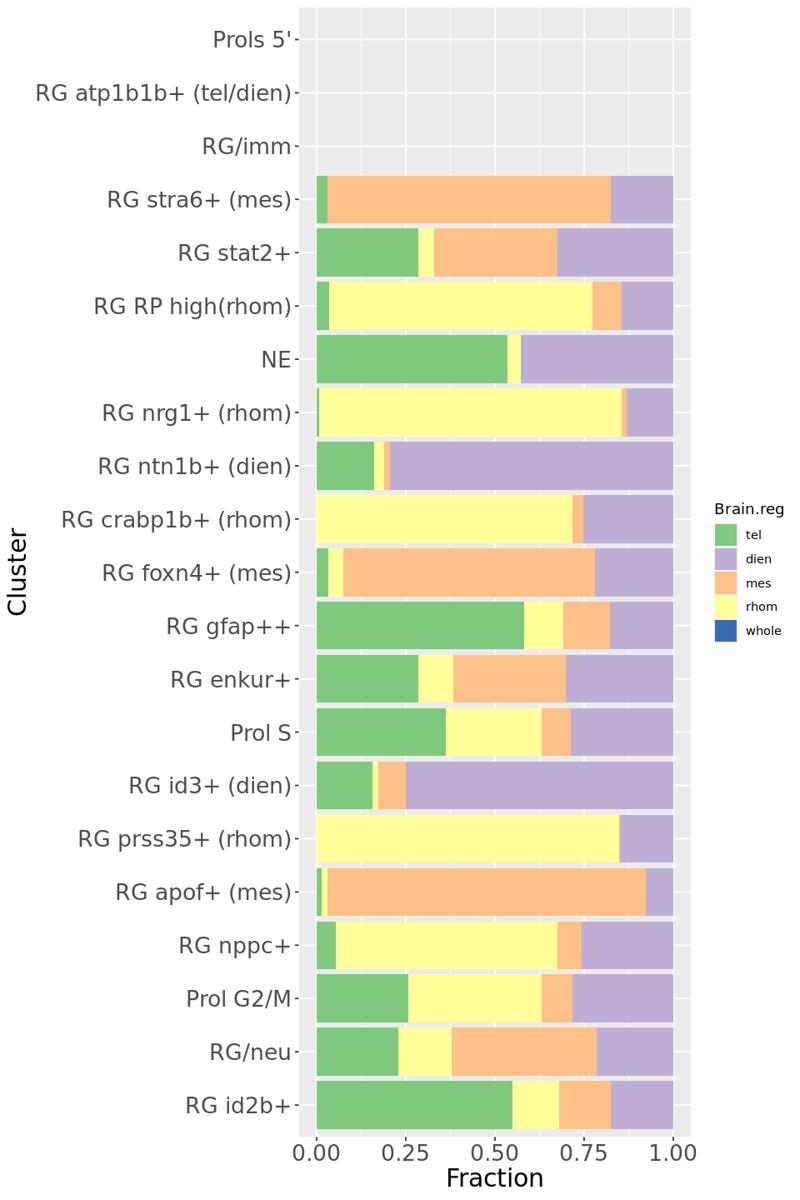

In [282]:
options(repr.plot.width=8, repr.plot.height=12)

p_br_diss

### Explore markers at detailed cell type level
For the purpose of GO term/enrichment analysis, I find it more useful to recalculate differentially expressed genes based on the merged and (semi-)verified detailed cell types rather than Louvain clusters.

In [3]:
str(rg_pool@meta.data)

'data.frame':	16387 obs. of  26 variables:
 $ orig.ident                         : chr  "b1_tel" "b1_tel" "b1_tel" "b1_tel" ...
 $ nCount_RNA                         : num  870 822 662 2128 1073 ...
 $ nFeature_RNA                       : int  428 356 308 804 414 1169 680 1659 251 1273 ...
 $ multiseq.relative.1.7              : chr  NA NA NA NA ...
 $ brain_reg                          : chr  "tel" "tel" "tel" "tel" ...
 $ kit_chem                           : chr  "3prim_v1" "3prim_v1" "3prim_v1" "3prim_v1" ...
 $ fixation                           : chr  "fresh" "fresh" "fresh" "fresh" ...
 $ percent.mt                         : num  2.11 0.491 18.2982 0.5429 0.0656 ...
 $ ident                              : chr  "b1_tel" "b1_tel" "b1_tel" "b1_tel" ...
 $ scDblFinder.class                  : chr  "singlet" "singlet" "singlet" "singlet" ...
 $ scDblFinder.score                  : num  0.0123 0.0873 0.1525 0.4752 0.2686 ...
 $ scDblFinder.weighted               : num  0.116 0.128 0.13

In [4]:
Idents(rg_pool) <- "pc28_res0.8_named_detailed_short"

In [5]:
# find markers
rg_pool.dct.markers.bimod <- FindAllMarkers(object = rg_pool, only.pos = TRUE, min.pct = 0.2, logfc.threshold = 0.2, test.use = "bimod")
rg_pool.dct.markers.bimod %>% group_by(cluster) %>% top_n(n = 2, wt = avg_log2FC)
write.csv(rg_pool.dct.markers.bimod, file = "/local/Nina/jupyterlab/brains_trans/rg_pool_markers/rg_pool_reg_dct_28pcs_res0-8_markers_bimod.csv")

Calculating cluster RG id2b+

Calculating cluster RG/neu

Calculating cluster Prol G2/M

Calculating cluster RG nppc+

Calculating cluster RG apof+ (mes)

Calculating cluster RG prss35+ (rhom)

Calculating cluster RG id3+ (dien)

Calculating cluster Prol S

Calculating cluster RG enkur+

Calculating cluster RG gfap++

Calculating cluster RG foxn4+ (mes)

Calculating cluster RG crabp1b+ (rhom)

Calculating cluster RG ntn1b+ (dien)

Calculating cluster RG nrg1+ (rhom)

Calculating cluster NE

Calculating cluster RG RP high(rhom)

Calculating cluster RG stat2+

Calculating cluster RG stra6+ (mes)

Calculating cluster RG/imm

Calculating cluster RG atp1b1b+ (tel/dien)

Calculating cluster Prols 5'



p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1.050677e-306,1.818856,0.599,0.318,2.556507e-302,RG id2b+,si:ch211-251b21.1
8.483833e-181,1.830859,0.335,0.133,2.064286e-176,RG id2b+,id2b
0.000000e+00,2.387086,0.426,0.110,0.000000e+00,RG/neu,epd
2.381312e-287,2.135441,0.480,0.171,5.794209e-283,RG/neu,mbpa
0.000000e+00,3.737129,0.950,0.420,0.000000e+00,Prol G2/M,hmgn2
0.000000e+00,3.294106,0.877,0.338,0.000000e+00,Prol G2/M,hmgb2a
0.000000e+00,4.325150,0.587,0.094,0.000000e+00,RG nppc+,stm
5.607445e-299,2.971357,0.311,0.018,1.364404e-294,RG nppc+,slc7a10a
0.000000e+00,2.895385,0.766,0.132,0.000000e+00,RG apof+ (mes),si:dkey-238o13.4


In [8]:
# sort markers in decending order by log2FC
rg_pool.dct.markers.bimod <- rg_pool.dct.markers.bimod %>% group_by(cluster) %>% arrange(desc(avg_log2FC), .by_group = TRUE)

In [20]:
levels(rg_pool.dct.markers.bimod$cluster)

[1] "RG id2b+"               "RG/neu"                 "Prol G2/M"             
 [4] "RG nppc+"               "RG apof+ (mes)"         "RG prss35+ (rhom)"     
 [7] "RG id3+ (dien)"         "Prol S"                 "RG enkur+"             
[10] "RG gfap++"              "RG foxn4+ (mes)"        "RG crabp1b+ (rhom)"    
[13] "RG ntn1b+ (dien)"       "RG nrg1+ (rhom)"        "NE"                    
[16] "RG RP high(rhom)"       "RG stat2+"              "RG stra6+ (mes)"       
[19] "RG/imm"                 "RG atp1b1b+ (tel/dien)" "Prols 5'"

In [21]:
# need to replace slash in RG/Neu in order to save file
rg_pool.dct.markers.bimod$cluster <- gsub("/", "-", rg_pool.dct.markers.bimod$cluster)

In [26]:
rg_pool.dct.markers.bimod$cluster <- as.factor(rg_pool.dct.markers.bimod$cluster)

In [27]:
levels(rg_pool.dct.markers.bimod$cluster)

[1] "NE"                     "Prol G2-M"              "Prol S"                
 [4] "Prols 5'"               "RG apof+ (mes)"         "RG atp1b1b+ (tel-dien)"
 [7] "RG crabp1b+ (rhom)"     "RG enkur+"              "RG foxn4+ (mes)"       
[10] "RG gfap++"              "RG id2b+"               "RG id3+ (dien)"        
[13] "RG nppc+"               "RG nrg1+ (rhom)"        "RG ntn1b+ (dien)"      
[16] "RG prss35+ (rhom)"      "RG RP high(rhom)"       "RG stat2+"             
[19] "RG stra6+ (mes)"        "RG-imm"                 "RG-neu"

In [33]:
# write separate txt file containing only genes for each cluster
for (celltype in levels(rg_pool.dct.markers.bimod$cluster)){
 print(celltype)
 markers_sub <- rg_pool.dct.markers.bimod[which(rg_pool.dct.markers.bimod$cluster == celltype),]$gene
 filepath <- paste0("/local/Nina/jupyterlab/brains_trans/rg_pool_markers/markers ",celltype,".txt")
 print(filepath)
 write.table(markers_sub, file = filepath, row.names = FALSE, quote = FALSE, col.names = FALSE)
}

[1] "NE"
[1] "/local/Nina/jupyterlab/brains_trans/rg_pool_markers/markers NE.txt"
[1] "Prol G2-M"
[1] "/local/Nina/jupyterlab/brains_trans/rg_pool_markers/markers Prol G2-M.txt"
[1] "Prol S"
[1] "/local/Nina/jupyterlab/brains_trans/rg_pool_markers/markers Prol S.txt"
[1] "Prols 5'"
[1] "/local/Nina/jupyterlab/brains_trans/rg_pool_markers/markers Prols 5'.txt"
[1] "RG apof+ (mes)"
[1] "/local/Nina/jupyterlab/brains_trans/rg_pool_markers/markers RG apof+ (mes).txt"
[1] "RG atp1b1b+ (tel-dien)"
[1] "/local/Nina/jupyterlab/brains_trans/rg_pool_markers/markers RG atp1b1b+ (tel-dien).txt"
[1] "RG crabp1b+ (rhom)"
[1] "/local/Nina/jupyterlab/brains_trans/rg_pool_markers/markers RG crabp1b+ (rhom).txt"
[1] "RG enkur+"
[1] "/local/Nina/jupyterlab/brains_trans/rg_pool_markers/markers RG enkur+.txt"
[1] "RG foxn4+ (mes)"
[1] "/local/Nina/jupyterlab/brains_trans/rg_pool_markers/markers RG foxn4+ (mes).txt"
[1] "RG gfap++"
[1] "/local/Nina/jupyterlab/brains_trans/rg_pool_markers/markers RG gfap++.t

In [34]:
table(rg_pool@active.ident)


              RG id2b+                 RG/neu              Prol G2/M 
                  2648                   3180                   1248 
              RG nppc+         RG apof+ (mes)      RG prss35+ (rhom) 
                  1155                   1690                    880 
        RG id3+ (dien)                 Prol S              RG enkur+ 
                   745                    659                    637 
             RG gfap++        RG foxn4+ (mes)     RG crabp1b+ (rhom) 
                   630                    500                    407 
      RG ntn1b+ (dien)        RG nrg1+ (rhom)                     NE 
                   386                    384                    234 
      RG RP high(rhom)              RG stat2+        RG stra6+ (mes) 
                   232                    139                     75 
                RG/imm RG atp1b1b+ (tel/dien)               Prols 5' 
                    49                    415                     94 

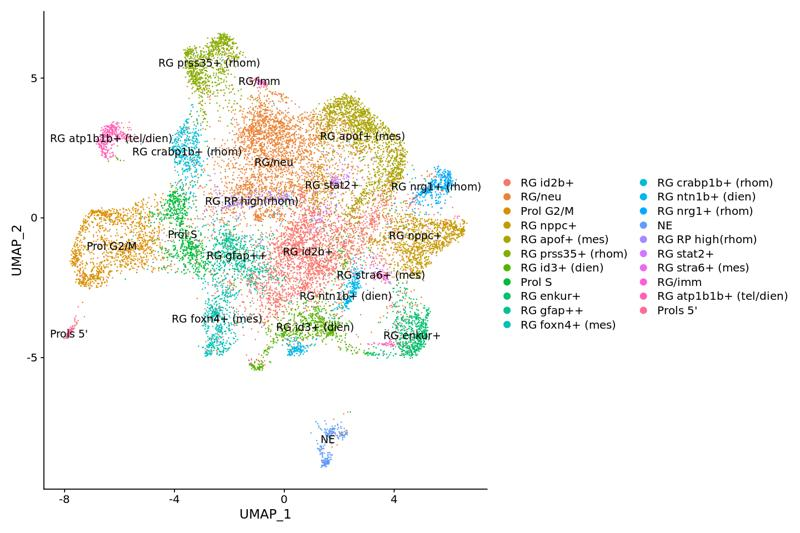

In [36]:
options(repr.plot.width=12, repr.plot.height=8)

DimPlot(rg_pool, label= TRUE)

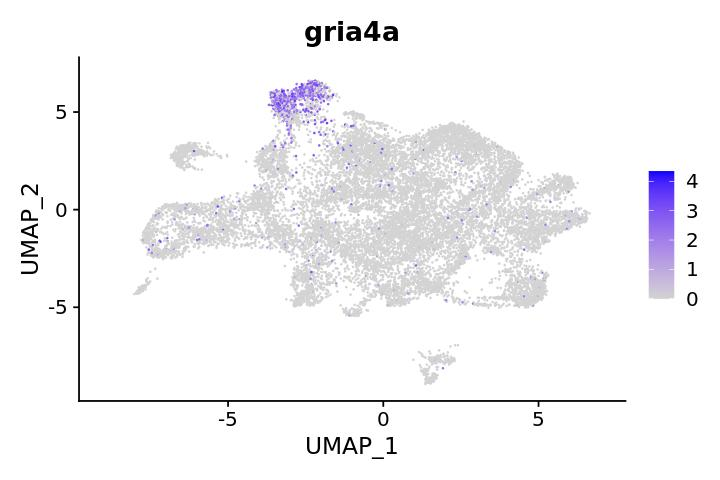

In [38]:
options(repr.plot.width=6, repr.plot.height=4)

FeaturePlot(rg_pool, features = c("gria4a"))

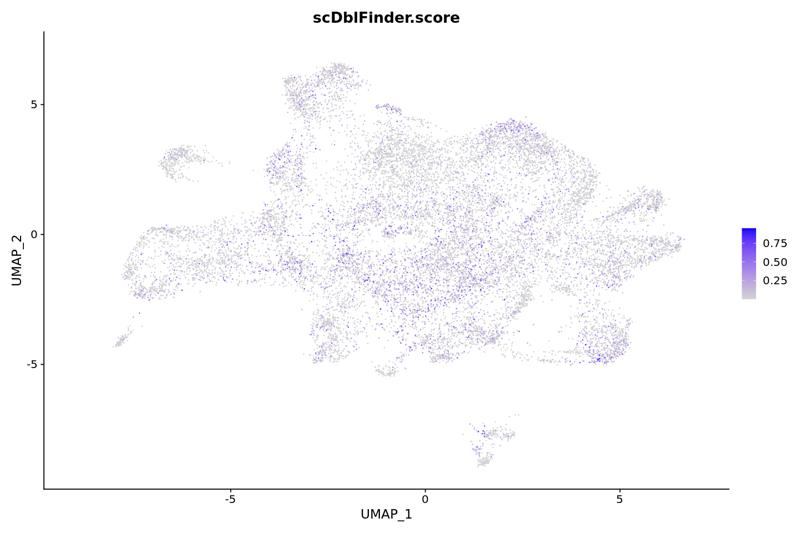

In [39]:
options(repr.plot.width=12, repr.plot.height=8)

FeaturePlot(rg_pool, features = c("scDblFinder.score"))

#### Explore markers for RG snap25a+

This is the cluster formerly called RG/neu. We want to prepare some ISH probes to validate it, because it has an interesting position in the velocity plot (possibly direct conversion pathway).  

In [12]:
rg_snap25a_markers <- read.csv(file = "/local/Nina/jupyterlab/brains_trans/rg_pool_markers/markers RG-neu.txt",
                              header = FALSE)

In [13]:
head(rg_snap25a_markers)

,V1
,<chr>
1,epd
2,mbpa
3,apoc1
4,cd59
5,snap25a
6,flj13639


In [14]:
rg_snap25a_markers <- rg_snap25a_markers$V1

In [16]:
length(rg_snap25a_markers)

[1] 286

In [17]:
rg_snap25a_top40 <- rg_snap25a_markers[1:40]

In [19]:
rg_snap25a_top80 <- rg_snap25a_markers[41:80]

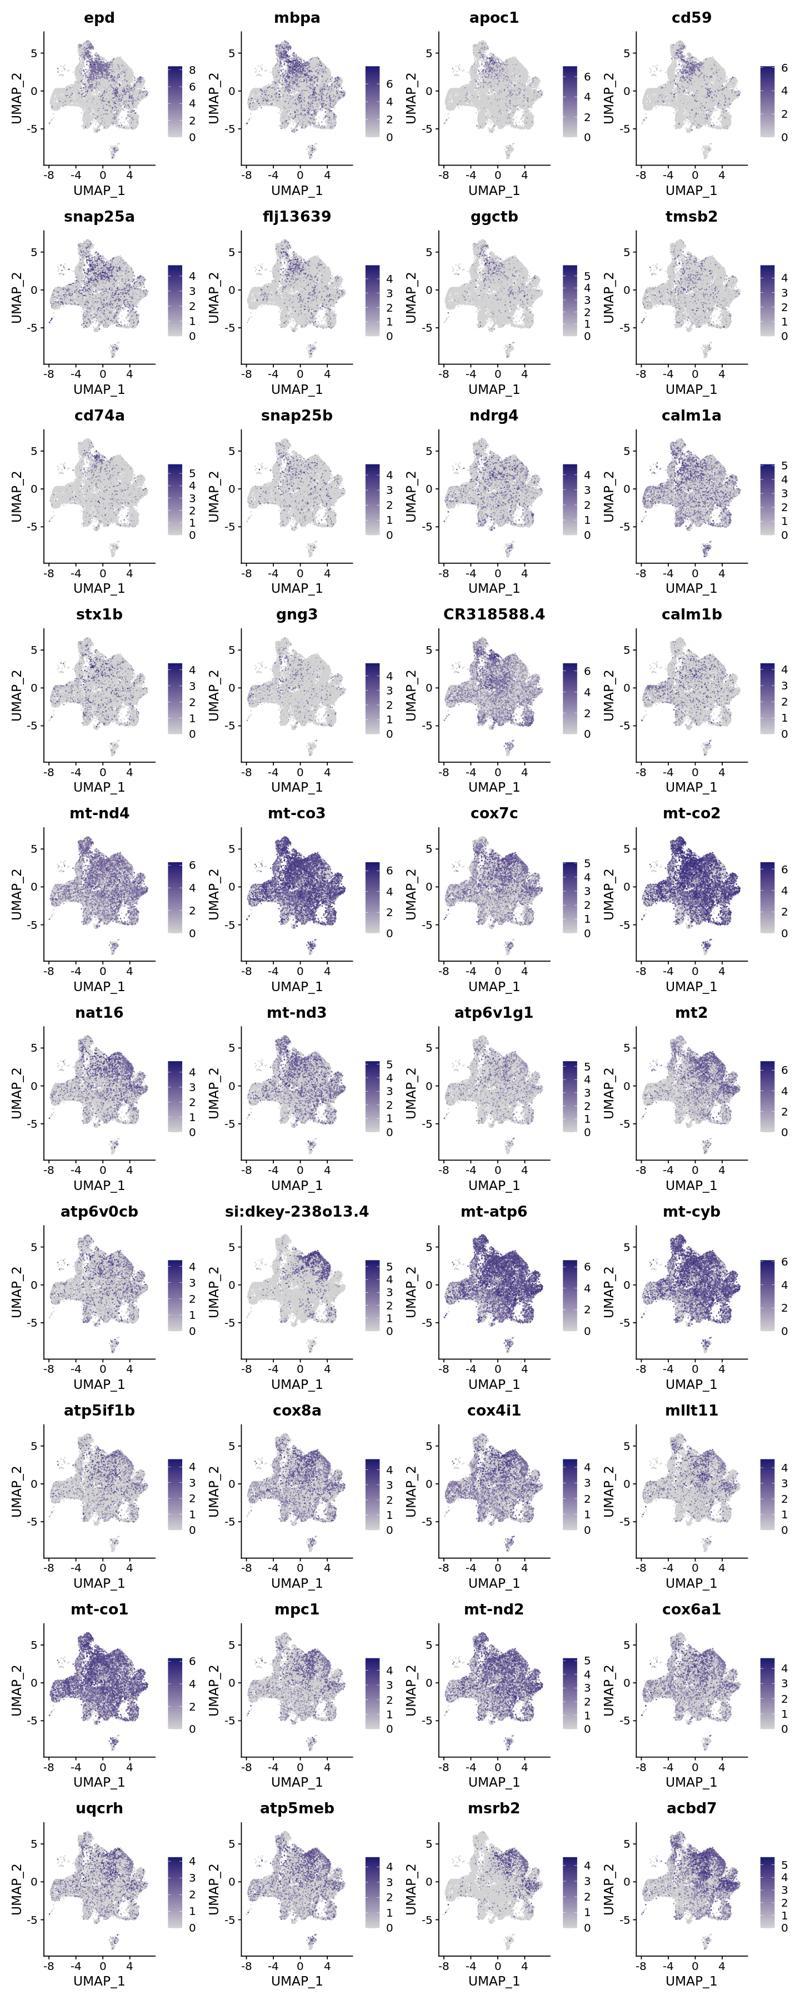

In [49]:
options(repr.plot.width=12, repr.plot.height=30)

FeaturePlot(object = rg_pool_sub, reduction = 'umap', features = rg_snap25a_top40, 
            ncol = 4, cols = c("lightgrey","midnightblue"),
           raster = FALSE)

In [ ]:
selected_markers_rg_snap25a <- c("", "", "", "",
                                "", "", "", "")

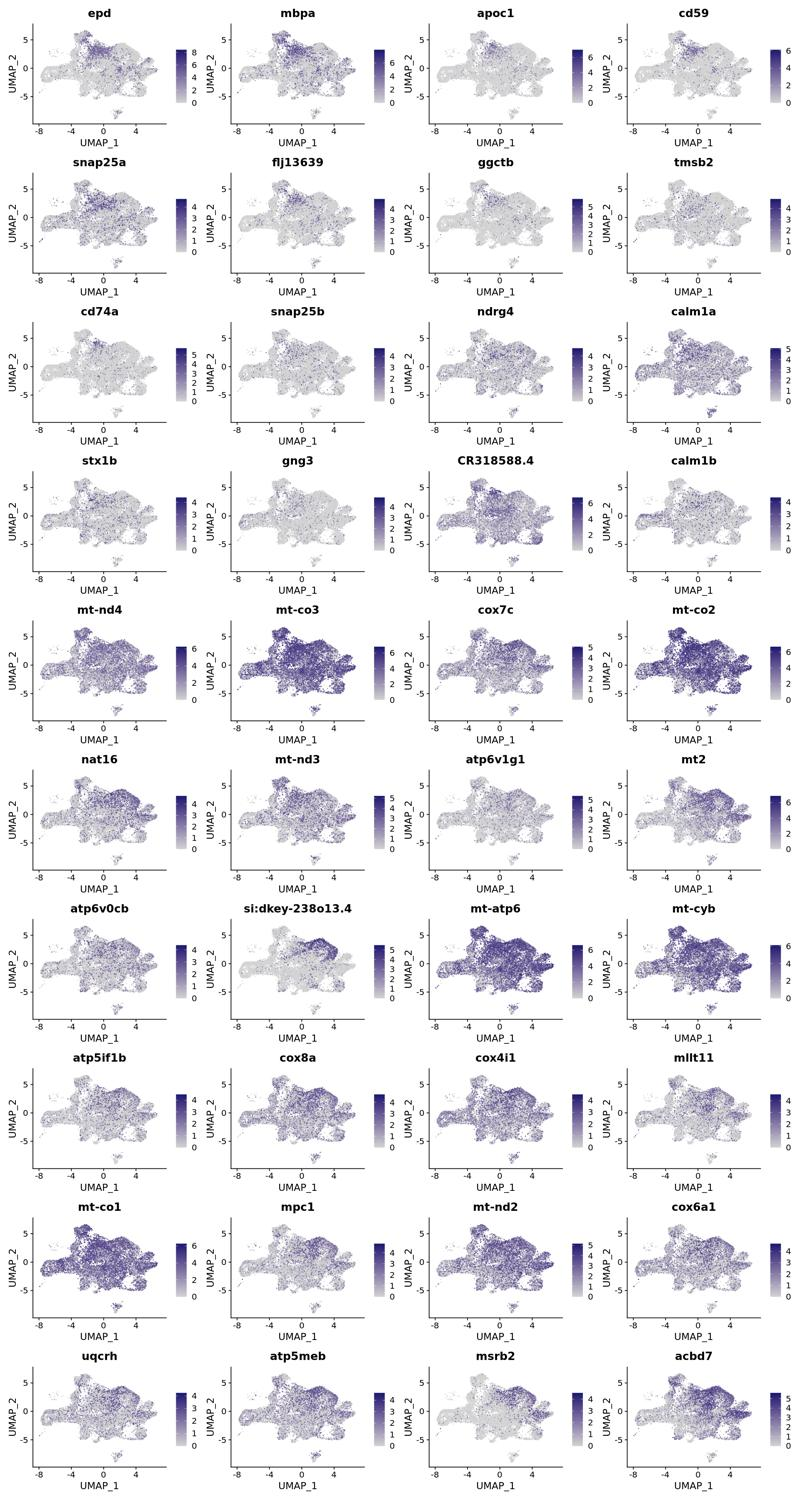

In [18]:
options(repr.plot.width=16, repr.plot.height=30)

FeaturePlot(object = rg_pool_sub, reduction = 'umap', features = rg_snap25a_top40, 
            ncol = 4, cols = c("lightgrey","midnightblue"),
           raster = FALSE)

The strange thing about this cluster is that many of the markers are actually representative for other major cell types (in addition to neurons, which were in the former name, there are known OGD, immmune and ependymal markers). Before investing in probes to validate this, I want to check some additonal markers for other cell types to see how much they label it. Also, I want to check for indications of possible contamination (library bias) or doublet identity.  

In [ ]:
# manually pick some top representative markers for other major cell types (from Fig1C)
# to see if concerns about doublet identity are justified
other_mct_markers <- c("snap25a", "syt1a", "stx1b", 
                      "cd74a", "cd74b", "pfn1",
                      "olig2", "mpz", "cd59",
                      "epd", "rbp4", "cp", 
                       "hbba1", "cahz", 
                      "krt8", "krt18",
                      "lyve1b", "sox7")

In [25]:
length(other_mct_markers)

[1] 18

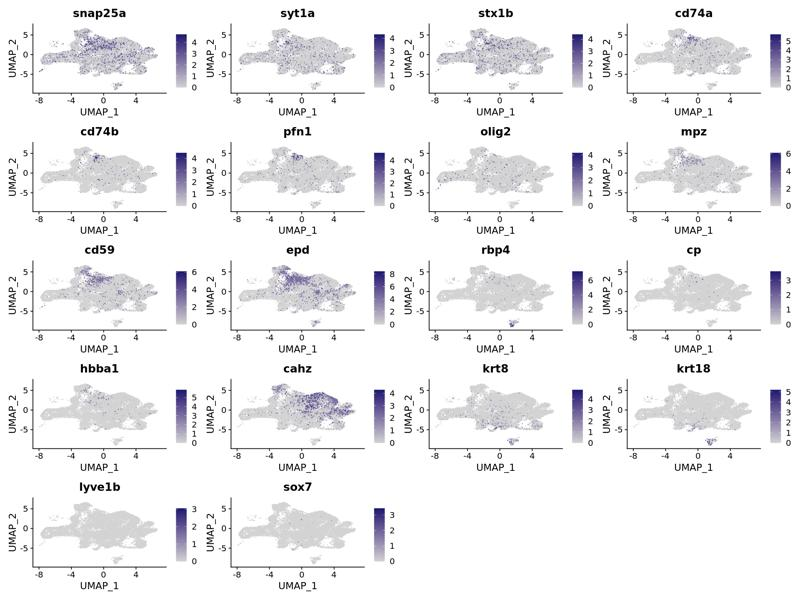

In [26]:
options(repr.plot.width=16, repr.plot.height=12)

FeaturePlot(object = rg_pool_sub, reduction = 'umap', features = other_mct_markers, 
            ncol = 4, cols = c("lightgrey","midnightblue"),
           raster = FALSE)

In [21]:
str(rg_pool_sub@meta.data)

'data.frame':	15829 obs. of  37 variables:
 $ orig.ident                          : chr  "b1_tel" "b1_tel" "b1_tel" "b1_tel" ...
 $ nCount_RNA                          : num  870 822 662 2128 1073 ...
 $ nFeature_RNA                        : int  428 356 308 804 414 1169 1659 251 1273 1012 ...
 $ multiseq.relative.1.7               : chr  NA NA NA NA ...
 $ brain_reg                           : chr  "tel" "tel" "tel" "tel" ...
 $ kit_chem                            : chr  "3prim_v1" "3prim_v1" "3prim_v1" "3prim_v1" ...
 $ fixation                            : chr  "fresh" "fresh" "fresh" "fresh" ...
 $ percent.mt                          : num  2.11 0.491 18.2982 0.5429 0.0656 ...
 $ ident                               : chr  "b1_tel" "b1_tel" "b1_tel" "b1_tel" ...
 $ scDblFinder.class                   : chr  "singlet" "singlet" "singlet" "singlet" ...
 $ scDblFinder.score                   : num  0.0123 0.0873 0.1525 0.4752 0.2686 ...
 $ scDblFinder.weighted                : num  0.1

In spite of sharing many markers of other cell types, neither gene/UMI counts nor predicted doublet scores support a doublet identity here.  

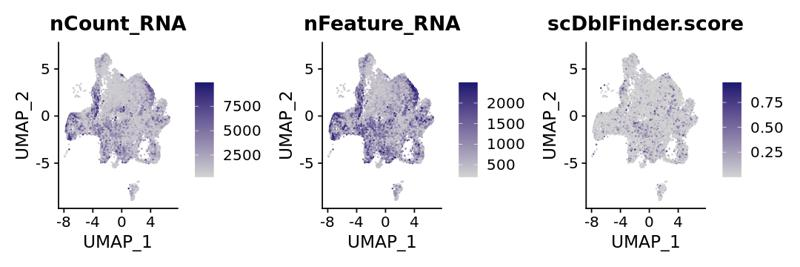

In [50]:
options(repr.plot.width=9, repr.plot.height=3)

FeaturePlot(object = rg_pool_sub, reduction = 'umap', features = c("nCount_RNA", "nFeature_RNA", "scDblFinder.score"), 
            ncol = 3, cols = c("lightgrey","midnightblue"),
           raster = FALSE)

In [27]:
# specifically look for markers that differentiate RG snap25a+ from RG id2b+
Idents(rg_pool_sub) <- "pc28_res0.8_clusters_numeric_edited"

In [28]:
markers_1_vs_2 <- FindMarkers(rg_pool_sub, ident.1 = 1, ident.2 = 2, 
  min.pct = 0.2, logfc.threshold = 0.2, test.use = "bimod")
markers_1_vs_2$gene <- rownames(markers_1_vs_2)
top_markers_1_vs_2 <- markers_1_vs_2 %>% top_n(n = 40, wt = avg_log2FC) %>% select(gene)
top_markers_1_vs_2 <- as.vector(top_markers_1_vs_2$gene)


In [29]:
markers_2_vs_1 <- FindMarkers(rg_pool_sub, ident.1 = 2, ident.2 = 1, 
  min.pct = 0.2, logfc.threshold = 0.2, test.use = "bimod")
markers_2_vs_1$gene <- rownames(markers_2_vs_1)
top_markers_2_vs_1 <- markers_2_vs_1 %>% top_n(n = 40, wt = avg_log2FC) %>% select(gene)
top_markers_2_vs_1 <- as.vector(top_markers_2_vs_1$gene)

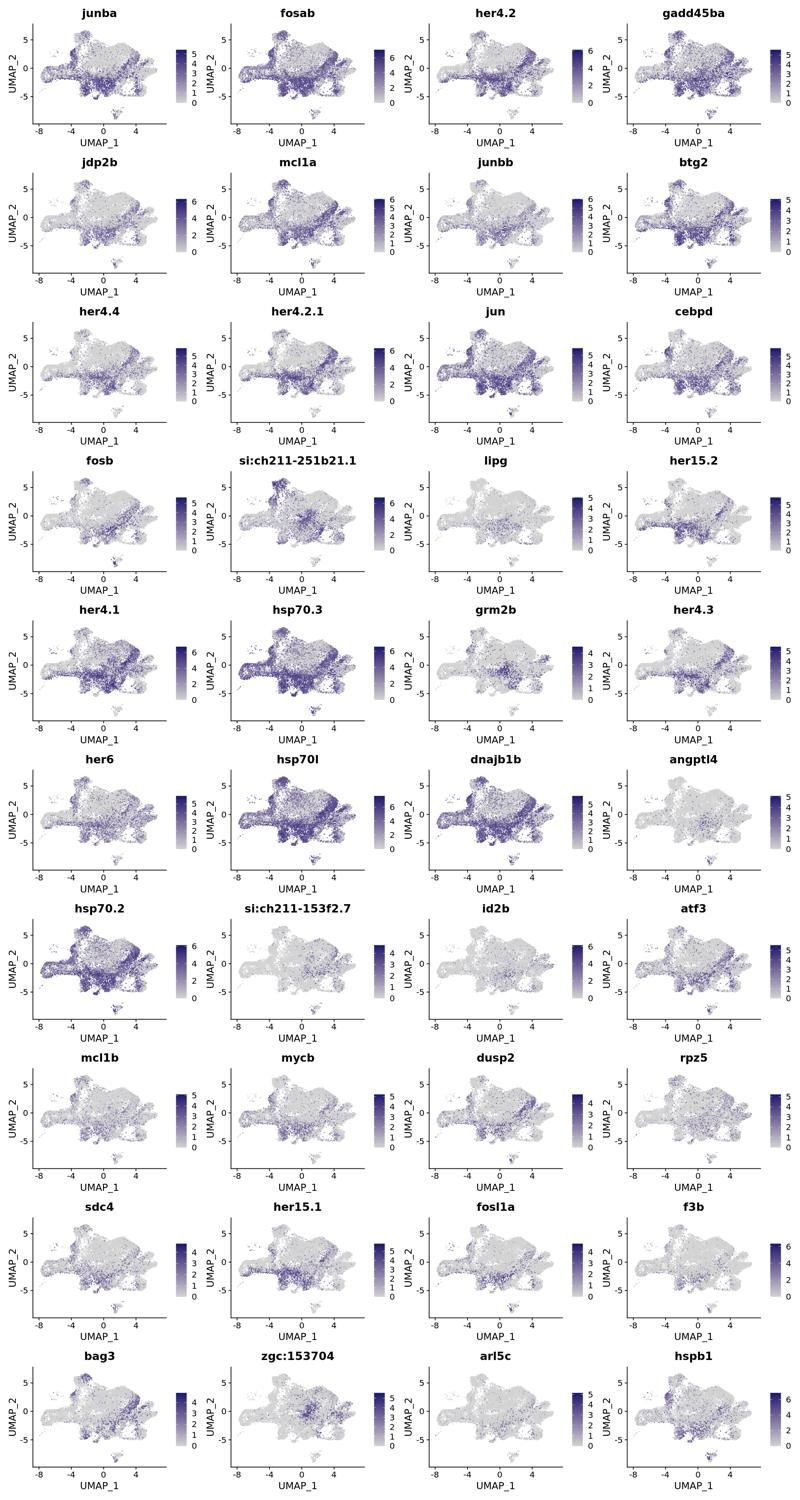

In [31]:
options(repr.plot.width=16, repr.plot.height=30)

FeaturePlot(object = rg_pool_sub, reduction = 'umap', features = top_markers_1_vs_2, 
            ncol = 4, cols = c("lightgrey","midnightblue"),
           raster = FALSE)

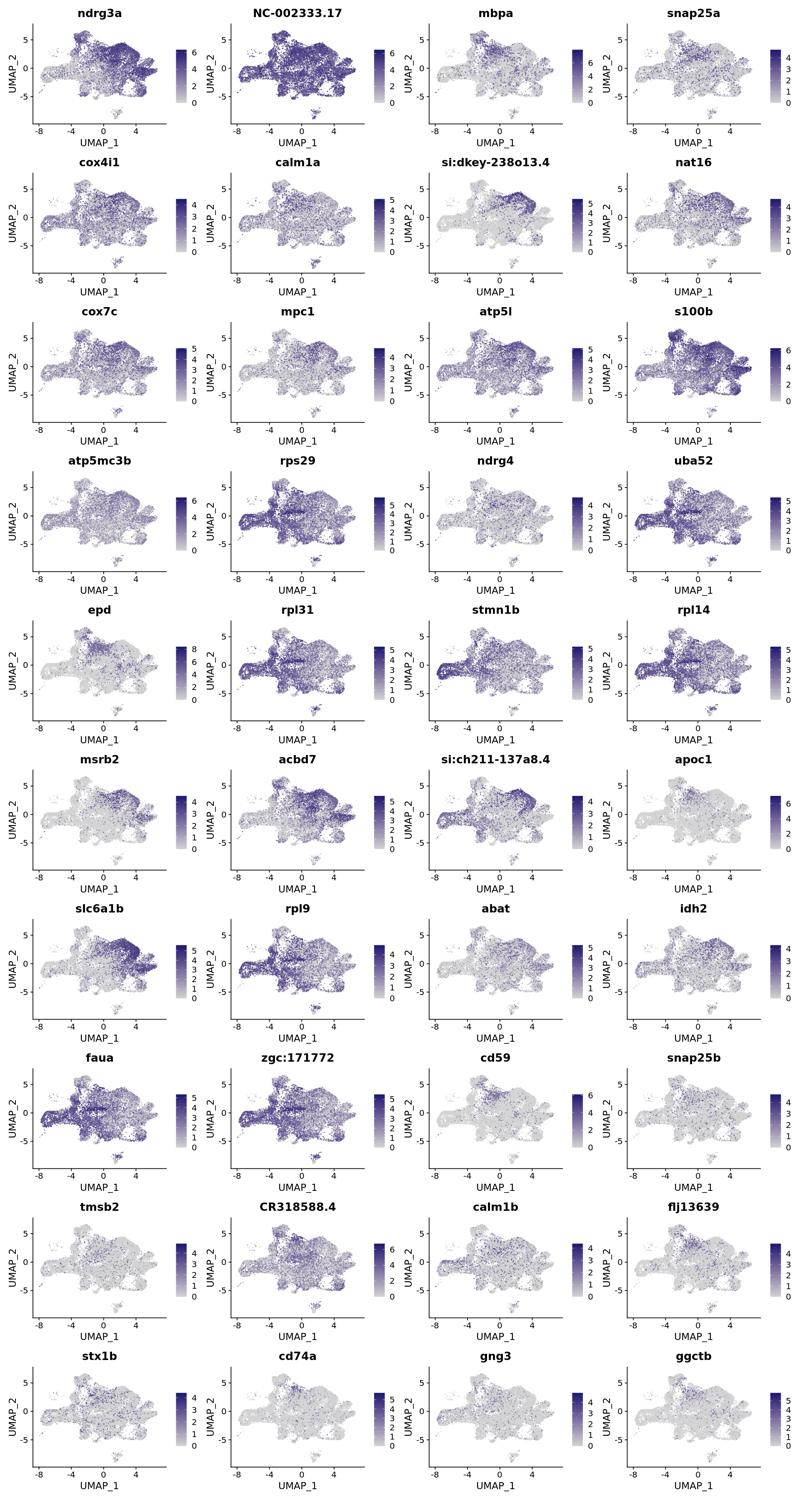

In [32]:
options(repr.plot.width=16, repr.plot.height=30)

FeaturePlot(object = rg_pool_sub, reduction = 'umap', features = top_markers_2_vs_1, 
            ncol = 4, cols = c("lightgrey","midnightblue"),
           raster = FALSE)

Check library composition of this cluster - if ambient RNA is an issue, it could be more library-specific than I noticed before.  

In [39]:
orig.ident.by.cluster <- table(rg_pool_sub$orig.ident, rg_pool_sub$pc28_res0.8_clusters_numeric_edited)

In [40]:
orig.ident.by.cluster[1:5, 1:5]

          
             1   2   3   4   5
  b1_tel   145  78  13   0   0
  b10_cer    9   4   6   0   0
  b10_dien  16  17  22   0   0
  b10_ot    68  99   9   0  12
  b10_tel   14  11   0   0   0

In [41]:
#margin = 1 sums across rows (how is brain reg distributed over clusters)
orig.ident.by.cluster.norm <- round(prop.table(orig.ident.by.cluster, margin = 1), digits = 10) * 100
#orig.ident.by.cluster.norm <- orig.ident.by.cluster.perc1 * 100

In [42]:
orig.ident.by.cluster.norm[1:5, 1:5]

          
                   1         2         3         4         5
  b1_tel   53.308824 28.676471  4.779412  0.000000  0.000000
  b10_cer  37.500000 16.666667 25.000000  0.000000  0.000000
  b10_dien  7.655502  8.133971 10.526316  0.000000  0.000000
  b10_ot   22.149837 32.247557  2.931596  0.000000  3.908795
  b10_tel  22.222222 17.460317  0.000000  0.000000  0.000000

In [43]:
#margin = 2 sums across columns (which brain regs make up each cluster) - this is what I need for per cluster calculation
#use as input rowwise normalized data
orig.ident.by.cluster.df <- as.data.frame(round(prop.table(orig.ident.by.cluster.norm, margin = 2), digits = 10))
colnames(orig.ident.by.cluster.df) <- c("Orig.ident", "Cluster", "Fraction")

In [44]:
head(orig.ident.by.cluster.df)

,Orig.ident,Cluster,Fraction
,<fct>,<fct>,<dbl>
1,b1_tel,1,0.09111113
2,b10_cer,1,0.06409197
3,b10_dien,1,0.01308417
4,b10_ot,1,0.03785671
5,b10_tel,1,0.03798043
6,b11_mult,1,0.02441599


In [47]:
p_orid <- ggplot(data = orig.ident.by.cluster.df, aes(x = Cluster, y = Fraction, fill = Orig.ident)) + geom_bar(stat="identity") + 
coord_cartesian(ylim = c(0,1)) + labs(x="Cluster", y="Fraction") +  
theme(axis.title = element_text(size = 18), axis.text = element_text(size = 16),   plot.title = element_text(size = 16, hjust = 0.5))  + 
coord_flip() 

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



Warning message:
“Removed 81 rows containing missing values (position_stack).”


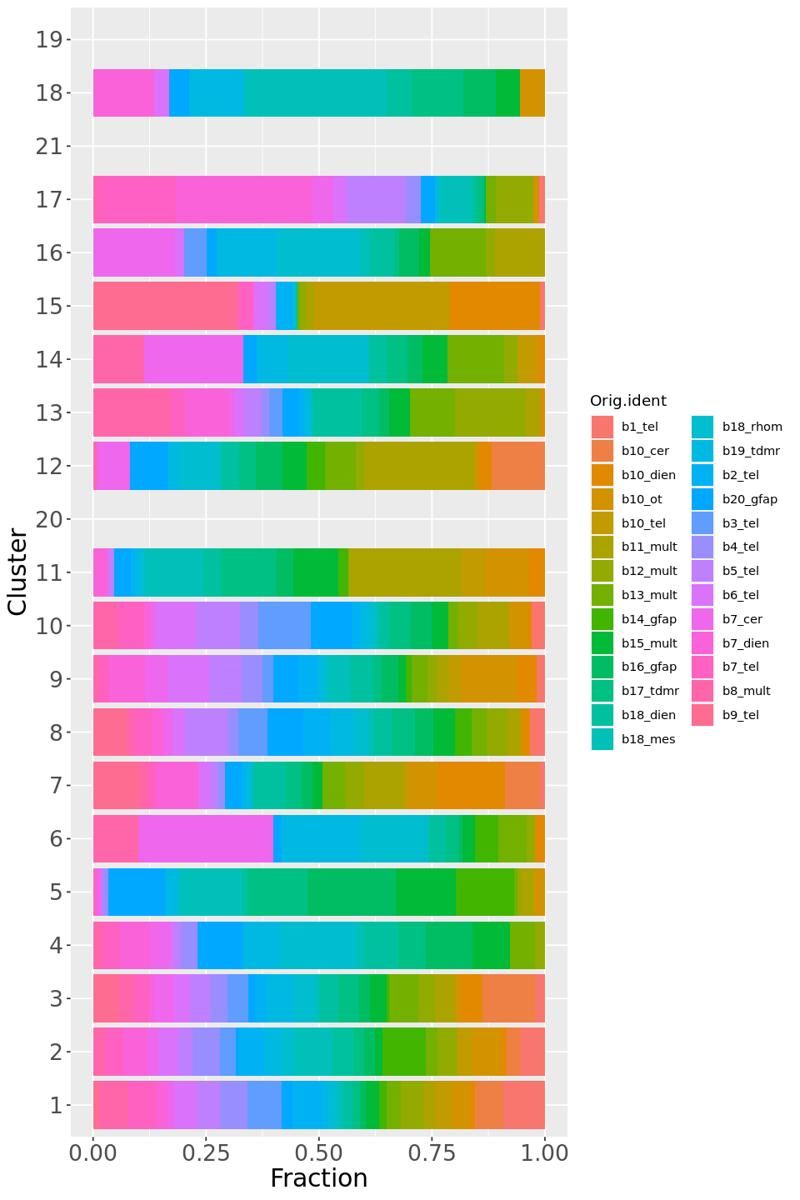

In [48]:
options(repr.plot.width=8, repr.plot.height=12)

p_orid

It seems on a very comparable level with all other clusters. So I don't see how high ambient would be a plausible explanation.  